In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.io.json import json_normalize
import json
%matplotlib inline

In [133]:
#%reset -f
#del train

In [134]:
json_cols = ['device', 'geoNetwork', 'totals', 'trafficSource']
json_conv = {col: json.loads for col in (json_cols)}
train = pd.read_csv("train.csv",
                    #nrows = 10000,
                    dtype={'fullVisitorId': str},
                    converters={'device': json.loads,
                               'geoNetwork': json.loads,
                               'totals': json.loads,
                               'trafficSource': json.loads,
                              })

In [135]:
train.head()

channelGrouping      date  \
0  Organic Search  20160902   
1  Organic Search  20160902   
2  Organic Search  20160902   
3  Organic Search  20160902   
4  Organic Search  20160902   

                                              device        fullVisitorId  \
0  {'browser': 'Chrome', 'browserVersion': 'not a...  1131660440785968503   
1  {'browser': 'Firefox', 'browserVersion': 'not ...   377306020877927890   
2  {'browser': 'Chrome', 'browserVersion': 'not a...  3895546263509774583   
3  {'browser': 'UC Browser', 'browserVersion': 'n...  4763447161404445595   
4  {'browser': 'Chrome', 'browserVersion': 'not a...    27294437909732085   

                                          geoNetwork  \
0  {'continent': 'Asia', 'subContinent': 'Western...   
1  {'continent': 'Oceania', 'subContinent': 'Aust...   
2  {'continent': 'Europe', 'subContinent': 'South...   
3  {'continent': 'Asia', 'subContinent': 'Southea...   
4  {'continent': 'Europe', 'subContinent': 'North...   

                        sessionId  socialEngagementType  \
0  1131660440785968503_1472830385  Not Socially Engaged   
1   377306020877927890_1472880147  Not Socially Engaged   
2  3895546263509774583_1472865386  Not Socially Engaged   
3  4763447161404445595_1472881213  Not Socially Engaged   
4    27294437909732085_1472822600  Not Socially Engaged   

                                              totals  \
0  {'visits': '1', 'hits': '1', 'pageviews': '1',...   
1  {'visits': '1', 'hits': '1', 'pageviews': '1',...   
2  {'visits': '1', 'hits': '1', 'pageviews': '1',...   
3  {'visits': '1', 'hits': '1', 'pageviews': '1',...   
4  {'visits': '1', 'hits': '1', 'pageviews': '1',...   

                                       trafficSource     visitId  visitNumber  \
0  {'campaign': '(not set)', 'source': 'google', ...  1472830385            1   
1  {'campaign': '(not set)', 'source': 'google', ...  1472880147            1   
2  {'campaign': '(not set)', 'source': 'google', ...  1472865386            1   
3  {'campaign': '(not set)', 'source': 'google', ...  1472881213            1   
4  {'campaign': '(not set)', 'source': 'google', ...  1472822600            2   

   visitStartTime  
0      1472830385  
1      1472880147  
2      1472865386  
3      1472881213  
4      1472822600

In [136]:
train.describe()

date       visitId    visitNumber  visitStartTime
count  9.036530e+05  9.036530e+05  903653.000000    9.036530e+05
mean   2.016589e+07  1.485007e+09       2.264897    1.485007e+09
std    4.697698e+03  9.022124e+06       9.283735    9.022124e+06
min    2.016080e+07  1.470035e+09       1.000000    1.470035e+09
25%    2.016103e+07  1.477561e+09       1.000000    1.477561e+09
50%    2.017011e+07  1.483949e+09       1.000000    1.483949e+09
75%    2.017042e+07  1.492759e+09       1.000000    1.492759e+09
max    2.017080e+07  1.501657e+09     395.000000    1.501657e+09

In [137]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 12 columns):
channelGrouping         903653 non-null object
date                    903653 non-null int64
device                  903653 non-null object
fullVisitorId           903653 non-null object
geoNetwork              903653 non-null object
sessionId               903653 non-null object
socialEngagementType    903653 non-null object
totals                  903653 non-null object
trafficSource           903653 non-null object
visitId                 903653 non-null int64
visitNumber             903653 non-null int64
visitStartTime          903653 non-null int64
dtypes: int64(4), object(8)
memory usage: 82.7+ MB


In [138]:
def extractJsonColumns(df):
    for col in json_cols:
        print('Working on :' + col)
        jsonCol = json_normalize(df[col].tolist())
        jsonCol.columns = [col+'_'+jcol for jcol in jsonCol.columns]
        df = df.merge(jsonCol,left_index=True,right_index=True)
        df.drop(col,axis=1,inplace=True)
    return(df)

In [139]:
train = extractJsonColumns(train)
train.columns

Working on :device
Working on :geoNetwork
Working on :totals
Working on :trafficSource


Index(['channelGrouping', 'date', 'fullVisitorId', 'sessionId',
       'socialEngagementType', 'visitId', 'visitNumber', 'visitStartTime',
       'device_browser', 'device_browserSize', 'device_browserVersion',
       'device_deviceCategory', 'device_flashVersion', 'device_isMobile',
       'device_language', 'device_mobileDeviceBranding',
       'device_mobileDeviceInfo', 'device_mobileDeviceMarketingName',
       'device_mobileDeviceModel', 'device_mobileInputSelector',
       'device_operatingSystem', 'device_operatingSystemVersion',
       'device_screenColors', 'device_screenResolution', 'geoNetwork_city',
       'geoNetwork_cityId', 'geoNetwork_continent', 'geoNetwork_country',
       'geoNetwork_latitude', 'geoNetwork_longitude', 'geoNetwork_metro',
       'geoNetwork_networkDomain', 'geoNetwork_networkLocation',
       'geoNetwork_region', 'geoNetwork_subContinent', 'totals_bounces',
       'totals_hits', 'totals_newVisits', 'totals_pageviews',
       'totals_transactionRevenue

In [140]:
len(train)

903653

In [141]:
def generateColumnInfo(df):
    cls = []
    nullCount = []
    nonNullCount = []
    nullsPct = []
    uniqCount = []
    dataType = []
    for i,col in enumerate(df.columns):
        cls.append(col)
        nullCount.append(df[col].isnull().sum())
        nonNullCount.append(len(df)-df[col].isnull().sum())
        nullsPct.append((df[col].isnull().sum())*(100)/len(df))
        uniqCount.append(df[col].nunique())
        dataType.append(df[col].dtype)
        
    column_info = pd.DataFrame(
        {'ColumnName': cls,
         'NullCount': nullCount,
         'NonNullCount': nonNullCount,
         'NullPercent': nullsPct,
         'UniqueValueCount': uniqCount,
         'DataType':dataType
        })
    return(column_info)

In [142]:
generateColumnInfo(train)

ColumnName  NullCount  \
0                                     channelGrouping          0   
1                                                date          0   
2                                       fullVisitorId          0   
3                                           sessionId          0   
4                                socialEngagementType          0   
5                                             visitId          0   
6                                         visitNumber          0   
7                                      visitStartTime          0   
8                                      device_browser          0   
9                                  device_browserSize          0   
10                              device_browserVersion          0   
11                              device_deviceCategory          0   
12                                device_flashVersion          0   
13                                    device_isMobile          0   
14                                    device_language          0   
15                        device_mobileDeviceBranding          0   
16                            device_mobileDeviceInfo          0   
17                   device_mobileDeviceMarketingName          0   
18                           device_mobileDeviceModel          0   
19                         device_mobileInputSelector          0   
20                             device_operatingSystem          0   
21                      device_operatingSystemVersion          0   
22                                device_screenColors          0   
23                            device_screenResolution          0   
24                                    geoNetwork_city          0   
25                                  geoNetwork_cityId          0   
26                               geoNetwork_continent          0   
27                                 geoNetwork_country          0   
28                                geoNetwork_latitude          0   
29                               geoNetwork_longitude          0   
30                                   geoNetwork_metro          0   
31                           geoNetwork_networkDomain          0   
32                         geoNetwork_networkLocation          0   
33                                  geoNetwork_region          0   
34                            geoNetwork_subContinent          0   
35                                     totals_bounces     453023   
36                                        totals_hits          0   
37                                   totals_newVisits     200593   
38                                   totals_pageviews        100   
39                          totals_transactionRevenue     892138   
40                                      totals_visits          0   
41                            trafficSource_adContent     892707   
42       trafficSource_adwordsClickInfo.adNetworkType     882193   
43  trafficSource_adwordsClickInfo.criteriaParameters          0   
44               trafficSource_adwordsClickInfo.gclId     882092   
45           trafficSource_adwordsClickInfo.isVideoAd     882193   
46                trafficSource_adwordsClickInfo.page     882193   
47                trafficSource_adwordsClickInfo.slot     882193   
48                             trafficSource_campaign          0   
49                         trafficSource_campaignCode     903652   
50                         trafficSource_isTrueDirect     629648   
51                              trafficSource_keyword     502929   
52                               trafficSource_medium          0   
53                         trafficSource_referralPath     572712   
54                               trafficSource_source          0   

    NonNullCount  NullPercent  UniqueValueCount DataType  
0         903653     0.000000                 8   object  
1         903653     0.000000               366    int64  
2         903653     0.000000            714167   object 

### Test

In [143]:
json_cols = ['device', 'geoNetwork', 'totals', 'trafficSource']
json_conv = {col: json.loads for col in (json_cols)}
test = pd.read_csv("test.csv",
                    #nrows = 10000,
                    dtype={'fullVisitorId': str},
                    converters={'device': json.loads,
                               'geoNetwork': json.loads,
                               'totals': json.loads,
                               'trafficSource': json.loads,
                              })

In [144]:
len(test)

804684

In [145]:
test.head()

channelGrouping      date  \
0  Organic Search  20171016   
1  Organic Search  20171016   
2  Organic Search  20171016   
3  Organic Search  20171016   
4  Organic Search  20171016   

                                              device        fullVisitorId  \
0  {'browser': 'Chrome', 'browserVersion': 'not a...  6167871330617112363   
1  {'browser': 'Chrome', 'browserVersion': 'not a...  0643697640977915618   
2  {'browser': 'Chrome', 'browserVersion': 'not a...  6059383810968229466   
3  {'browser': 'Safari', 'browserVersion': 'not a...  2376720078563423631   
4  {'browser': 'Safari', 'browserVersion': 'not a...  2314544520795440038   

                                          geoNetwork  \
0  {'continent': 'Asia', 'subContinent': 'Southea...   
1  {'continent': 'Europe', 'subContinent': 'South...   
2  {'continent': 'Europe', 'subContinent': 'Weste...   
3  {'continent': 'Americas', 'subContinent': 'Nor...   
4  {'continent': 'Americas', 'subContinent': 'Nor...   

                        sessionId  socialEngagementType  \
0  6167871330617112363_1508151024  Not Socially Engaged   
1  0643697640977915618_1508175522  Not Socially Engaged   
2  6059383810968229466_1508143220  Not Socially Engaged   
3  2376720078563423631_1508193530  Not Socially Engaged   
4  2314544520795440038_1508217442  Not Socially Engaged   

                                              totals  \
0     {'visits': '1', 'hits': '4', 'pageviews': '4'}   
1  {'visits': '1', 'hits': '5', 'pageviews': '5',...   
2  {'visits': '1', 'hits': '7', 'pageviews': '7',...   
3  {'visits': '1', 'hits': '8', 'pageviews': '4',...   
4  {'visits': '1', 'hits': '9', 'pageviews': '4',...   

                                       trafficSource     visitId  visitNumber  \
0  {'campaign': '(not set)', 'source': 'google', ...  1508151024            2   
1  {'campaign': '(not set)', 'source': 'google', ...  1508175522            1   
2  {'campaign': '(not set)', 'source': 'google', ...  1508143220            1   
3  {'campaign': '(not set)', 'source': 'google', ...  1508193530            1   
4  {'campaign': '(not set)', 'source': 'google', ...  1508217442            1   

   visitStartTime  
0      1508151024  
1      1508175522  
2      1508143220  
3      1508193530  
4      1508217442

In [146]:
test = extractJsonColumns(test)
test.columns

Working on :device
Working on :geoNetwork
Working on :totals
Working on :trafficSource


Index(['channelGrouping', 'date', 'fullVisitorId', 'sessionId',
       'socialEngagementType', 'visitId', 'visitNumber', 'visitStartTime',
       'device_browser', 'device_browserSize', 'device_browserVersion',
       'device_deviceCategory', 'device_flashVersion', 'device_isMobile',
       'device_language', 'device_mobileDeviceBranding',
       'device_mobileDeviceInfo', 'device_mobileDeviceMarketingName',
       'device_mobileDeviceModel', 'device_mobileInputSelector',
       'device_operatingSystem', 'device_operatingSystemVersion',
       'device_screenColors', 'device_screenResolution', 'geoNetwork_city',
       'geoNetwork_cityId', 'geoNetwork_continent', 'geoNetwork_country',
       'geoNetwork_latitude', 'geoNetwork_longitude', 'geoNetwork_metro',
       'geoNetwork_networkDomain', 'geoNetwork_networkLocation',
       'geoNetwork_region', 'geoNetwork_subContinent', 'totals_bounces',
       'totals_hits', 'totals_newVisits', 'totals_pageviews', 'totals_visits',
       'trafficS

In [147]:
generateColumnInfo(test)

ColumnName  NullCount  \
0                                     channelGrouping          0   
1                                                date          0   
2                                       fullVisitorId          0   
3                                           sessionId          0   
4                                socialEngagementType          0   
5                                             visitId          0   
6                                         visitNumber          0   
7                                      visitStartTime          0   
8                                      device_browser          0   
9                                  device_browserSize          0   
10                              device_browserVersion          0   
11                              device_deviceCategory          0   
12                                device_flashVersion          0   
13                                    device_isMobile          0   
14                                    device_language          0   
15                        device_mobileDeviceBranding          0   
16                            device_mobileDeviceInfo          0   
17                   device_mobileDeviceMarketingName          0   
18                           device_mobileDeviceModel          0   
19                         device_mobileInputSelector          0   
20                             device_operatingSystem          0   
21                      device_operatingSystemVersion          0   
22                                device_screenColors          0   
23                            device_screenResolution          0   
24                                    geoNetwork_city          0   
25                                  geoNetwork_cityId          0   
26                               geoNetwork_continent          0   
27                                 geoNetwork_country          0   
28                                geoNetwork_latitude          0   
29                               geoNetwork_longitude          0   
30                                   geoNetwork_metro          0   
31                           geoNetwork_networkDomain          0   
32                         geoNetwork_networkLocation          0   
33                                  geoNetwork_region          0   
34                            geoNetwork_subContinent          0   
35                                     totals_bounces     383736   
36                                        totals_hits          0   
37                                   totals_newVisits     200314   
38                                   totals_pageviews        139   
39                                      totals_visits          0   
40                            trafficSource_adContent     750893   
41       trafficSource_adwordsClickInfo.adNetworkType     750870   
42  trafficSource_adwordsClickInfo.criteriaParameters          0   
43               trafficSource_adwordsClickInfo.gclId     750822   
44           trafficSource_adwordsClickInfo.isVideoAd     750870   
45                trafficSource_adwordsClickInfo.page     750870   
46                trafficSource_adwordsClickInfo.slot     750870   
47                             trafficSource_campaign          0   
48                         trafficSource_isTrueDirect     544171   
49                              trafficSource_keyword     391032   
50                               trafficSource_medium          0   
51                         trafficSource_referralPath     569361   
52                               trafficSource_source          0   

    NonNullCount  NullPercent  UniqueValueCount DataType  
0         804684     0.000000                 8   object  
1         804684     0.000000               272    int64  
2         804684     0.000000            617242   object  
3         804684     0.000000            803863   object  
4         804684     0.000000                 1   object  
5         804684

## Drop Columns

In [148]:
set(train.columns).difference(set(test.columns))

{'totals_transactionRevenue', 'trafficSource_campaignCode'}

In [149]:
train.drop('trafficSource_campaignCode',axis=1,inplace=True)

In [150]:
trn_colInfo = generateColumnInfo(train)
trn_colInfo[(trn_colInfo['NullCount'] == 0) & (trn_colInfo['UniqueValueCount'] == 1)]

ColumnName  NullCount  \
4                                socialEngagementType          0   
9                                  device_browserSize          0   
10                              device_browserVersion          0   
12                                device_flashVersion          0   
14                                    device_language          0   
15                        device_mobileDeviceBranding          0   
16                            device_mobileDeviceInfo          0   
17                   device_mobileDeviceMarketingName          0   
18                           device_mobileDeviceModel          0   
19                         device_mobileInputSelector          0   
21                      device_operatingSystemVersion          0   
22                                device_screenColors          0   
23                            device_screenResolution          0   
25                                  geoNetwork_cityId          0   
28                                geoNetwork_latitude          0   
29                               geoNetwork_longitude          0   
32                         geoNetwork_networkLocation          0   
40                                      totals_visits          0   
43  trafficSource_adwordsClickInfo.criteriaParameters          0   

    NonNullCount  NullPercent  UniqueValueCount DataType  
4         903653          0.0                 1   object  
9         903653          0.0                 1   object  
10        903653          0.0                 1   object  
12        903653          0.0                 1   object  
14        903653          0.0                 1   object  
15        903653          0.0                 1   object  
16        903653          0.0                 1   object  
17        903653          0.0                 1   object  
18        903653          0.0                 1   object  
19        903653          0.0                 1   object  
21        903653          0.0                 1   object  
22        903653          0.0                 1   object  
23        903653          0.0                 1   object  
25        903653          0.0                 1   object  
28        903653          0.0                 1   object  
29        903653          0.0                 1   object  
32        903653          0.0                 1   object  
40        903653          0.0                 1   object  
43        903653          0.0                 1   object

These columns have a single unique value. They can be dropped.

In [151]:
train.drop(['socialEngagementType',
'device_browserSize',
'device_browserVersion',
'device_flashVersion',
'device_language',
'device_mobileDeviceBranding',
'device_mobileDeviceInfo',
'device_mobileDeviceMarketingName',
'device_mobileDeviceModel',
'device_mobileInputSelector',
'device_operatingSystemVersion',
'device_screenColors',
'device_screenResolution',
'geoNetwork_cityId',
'geoNetwork_latitude',
'geoNetwork_longitude',
'geoNetwork_networkLocation',
'totals_visits',
'trafficSource_adwordsClickInfo.criteriaParameters'],axis=1,inplace=True)

## Missing Values and EDA

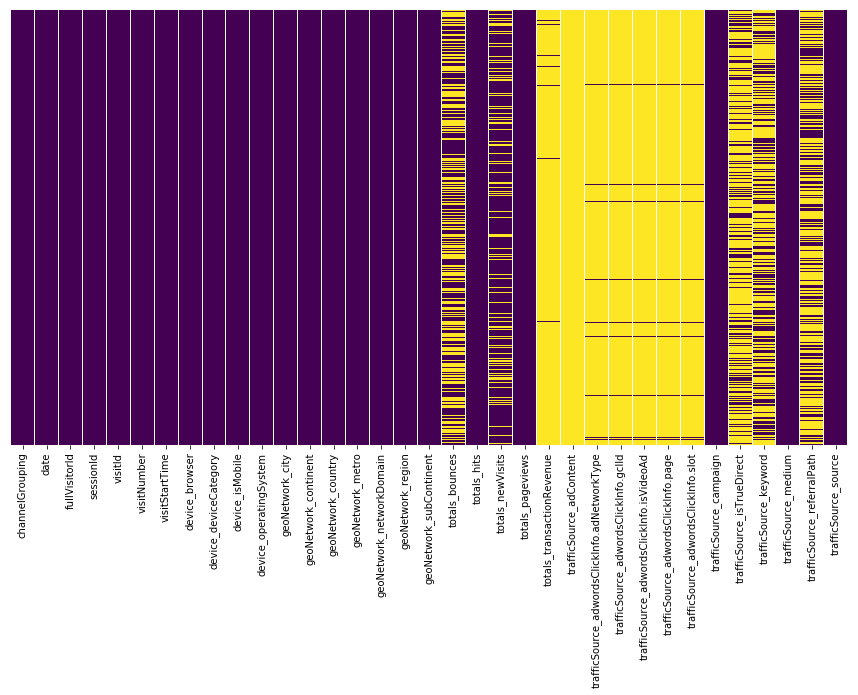

In [152]:
plt.figure(figsize=(15,8))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [153]:
def plot_colCount(df,col,xtick=0,w=12,h=7):
    plt.figure(figsize=(w,h))
    p = sns.countplot(data =df,x=col)
    plt.xticks(rotation=xtick)
    plt.title('Count of ' + col)
    plt.show()
    
def plot_totalRevenue(df,col,xtick=0,w=12,h=7):
    groupedDf = df.groupby(col,as_index=False)['totals_transactionRevenue'].sum()
    groupedDf = groupedDf[groupedDf['totals_transactionRevenue']>0]
    plt.figure(figsize=(w,h))
    p = sns.barplot(data=groupedDf,x=col,y='totals_transactionRevenue')
    plt.xticks(rotation=xtick)
    plt.title('Total revenue by ' + col)
    plt.show()
    
def plot_revenuePerUnitCol(df,col,xtick=0,w=12,h=7):
    plt.figure(figsize=(w,h))
    plt.ylim()
    p = sns.barplot(data =df,x=col,y='totals_transactionRevenue',ci=False)
    plt.xticks(rotation=xtick)
    plt.title('Revenue per visit')
    plt.show()

### Target Column

In [154]:
print(train['totals_transactionRevenue'].isnull().sum())

892138


In [155]:
train['totals_transactionRevenue'].fillna(0,inplace=True)
train['totals_transactionRevenue'] = train['totals_transactionRevenue'].astype('int64')

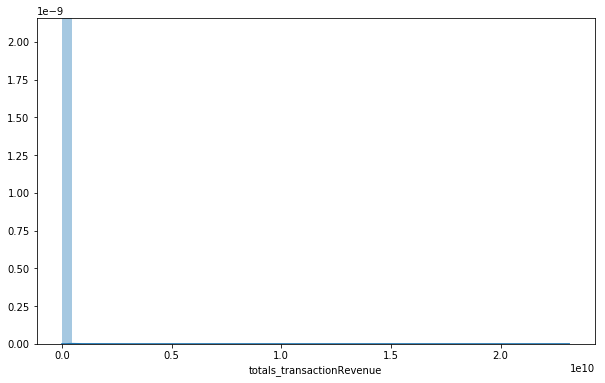

In [156]:
plt.figure(figsize=[10,6])
sns.distplot(train['totals_transactionRevenue'])

### Channel Grouping

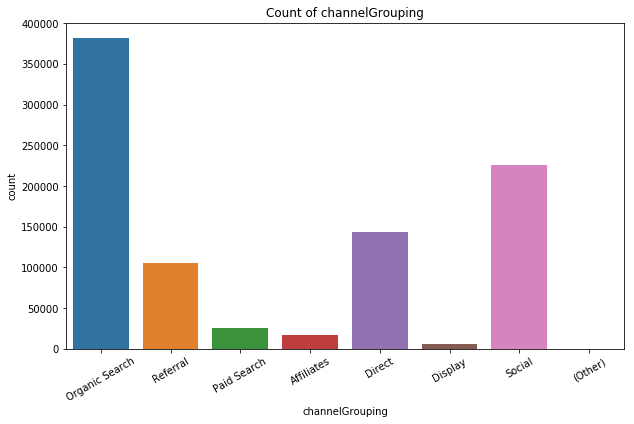

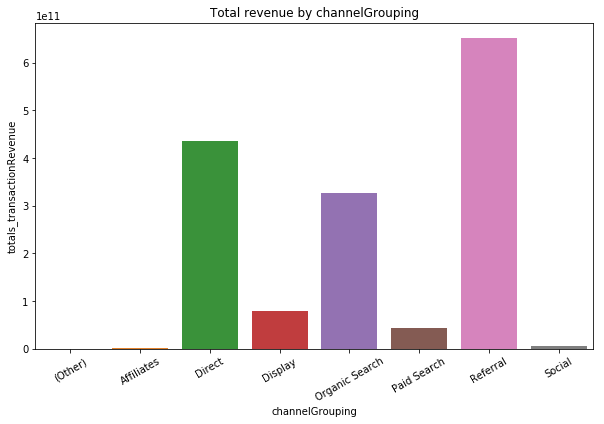

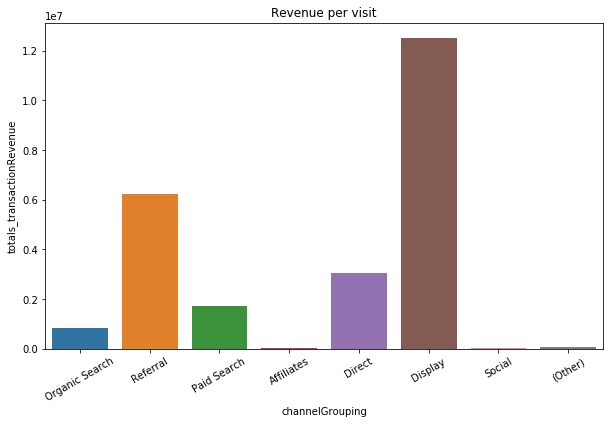

In [157]:
plot_colCount(train,'channelGrouping',30,10,6)
plot_totalRevenue(train,'channelGrouping',30,10,6)
plot_revenuePerUnitCol(train,'channelGrouping',30,10,6)

- Organic search generates the most number of visits
- Referral generates the 4th most number of visits but generates the most revenue
- Display generates the most revenue per visit

### Date

In [158]:
train['date'] = pd.to_datetime(train['date'],format='%Y%m%d')

In [159]:
import math
byDate = train.groupby('date',as_index=False).agg({'visitId':'count','totals_transactionRevenue':'sum'}).rename(columns={'visitId':'visits','totals_transactionRevenue':'totalRevenue'})
byDate['totalRevenue'] = byDate['totalRevenue']/1000000
byDateFlat = byDate.melt('date',var_name ='Numbers',value_name='values')

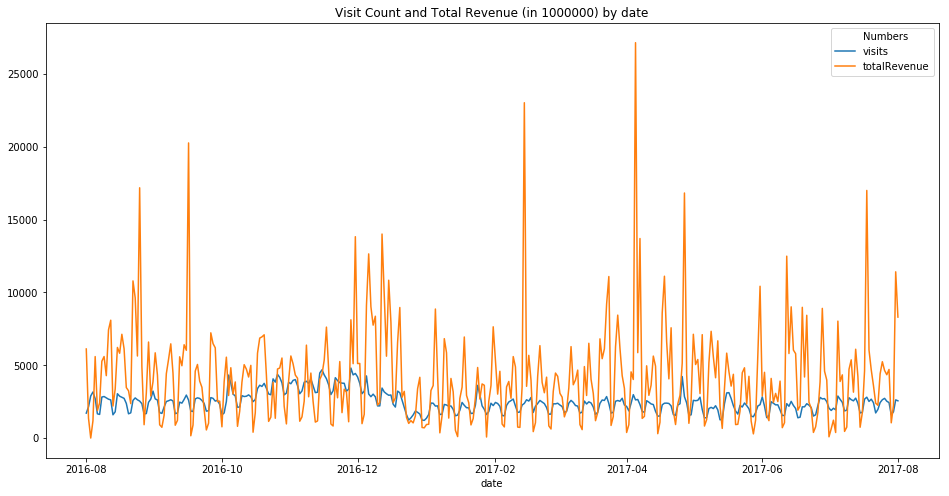

In [160]:
plt.figure(figsize=(16,8))
new_labels = ['label 1', 'label 2']
sns.lineplot(data=byDateFlat,x='date',y='values',hue='Numbers')
plt.title('Visit Count and Total Revenue (in 1000000) by date')
plt.ylabel('')
plt.show()
del byDateFlat
del byDate

- There is an increase in visits during the holiday period
- There is an increase in the revenue during the same period

In [161]:
train['date_year'],train['date_month'],train['date_weekday'] = train['date'].dt.year,train['date'].dt.month,train['date'].dt.weekday
train.drop('date',axis=1,inplace=True)

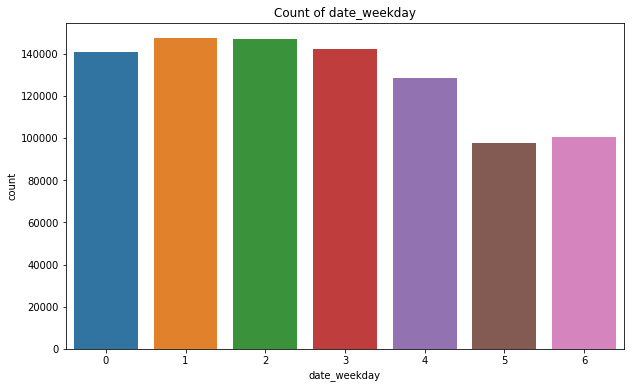

In [162]:
plot_colCount(train,'date_weekday',0,10,6)

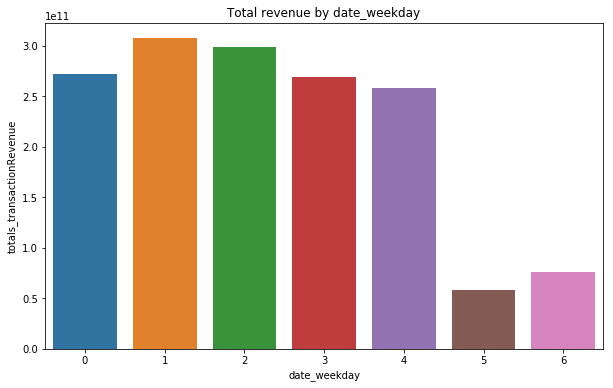

In [163]:
plot_totalRevenue(train,'date_weekday',0,10,6)
#Monday=0, Sunday=6

- Tuesdays, Wednesdays and Thursdays generate the most visits and revenue

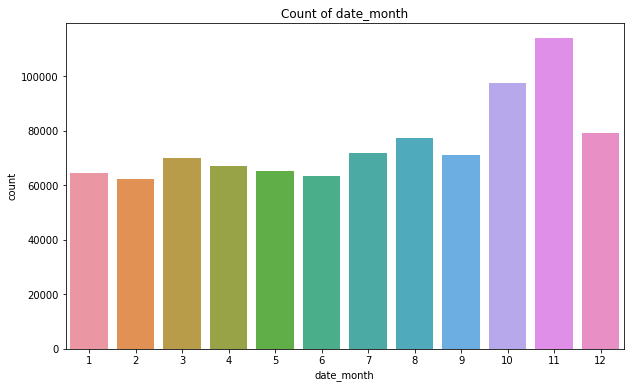

In [164]:
plot_colCount(train,'date_month',0,10,6)

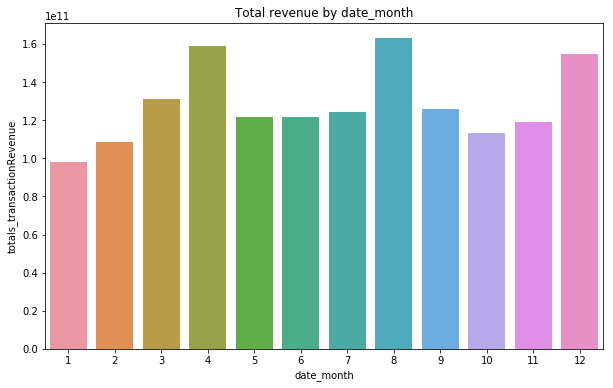

In [165]:
plot_totalRevenue(train,'date_month',0,10,6)

- October and November have the highest traffic
- April, Agust and December generate the most revenue

### fullVisitorId

In [166]:
train['fullVisitorId'].value_counts().head(10)

1957458976293878100    278
0824839726118485274    255
3608475193341679870    201
1856749147915772585    199
3269834865385146569    155
0720311197761340948    153
7634897085866546110    148
4038076683036146727    138
0232377434237234751    135
3694234028523165868    129
Name: fullVisitorId, dtype: int64

In [167]:
train.groupby('fullVisitorId').sum()['totals_transactionRevenue'].sort_values(ascending=False).head(10)

fullVisitorId
1957458976293878100    77113430000
5632276788326171571    16023750000
9417857471295131045    15170120000
4471415710206918415    11211100000
4984366501121503466     9513900000
9089132392240687728     8951970000
9029794295932939024     7846350000
7463172420271311409     7225100000
7311242886083854158     7143250000
79204932396995037       7047150000
Name: totals_transactionRevenue, dtype: int64

- Visitor ID 1957458976293878100 has 278 visits and generates the most revenue

### visitNumber

In [168]:
train['visitNumber'].value_counts().head()

1    703060
2     92548
3     35843
4     19157
5     11615
Name: visitNumber, dtype: int64

### device_browser

In [169]:
train['device_browser'].value_counts().head(10)

Chrome               620364
Safari               182245
Firefox               37069
Internet Explorer     19375
Edge                  10205
Android Webview        7865
Safari (in-app)        6850
Opera Mini             6139
Opera                  5643
UC Browser             2427
Name: device_browser, dtype: int64

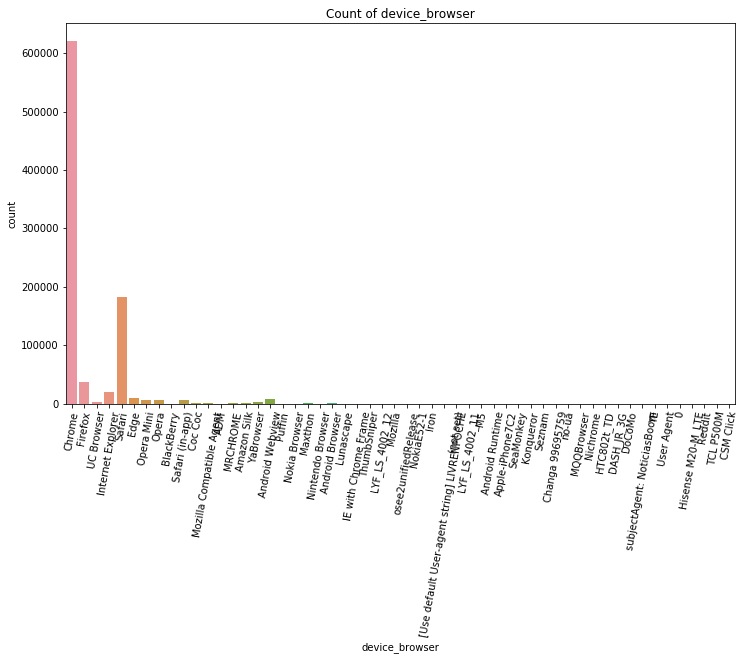

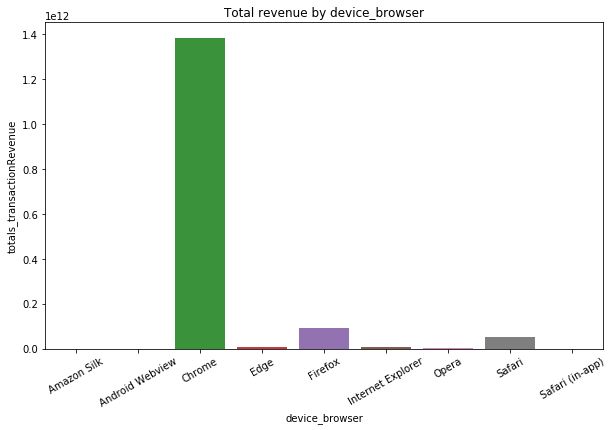

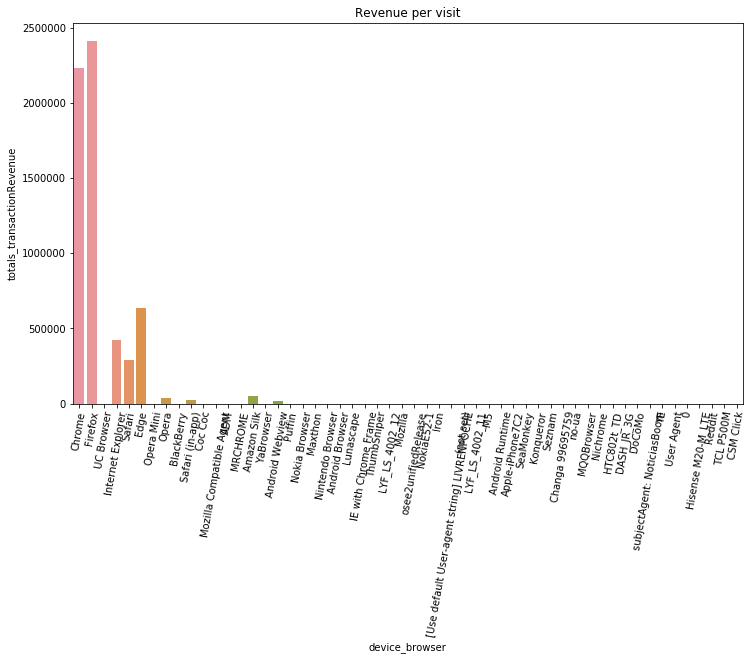

In [170]:
plot_colCount(train,'device_browser',80)
plot_totalRevenue(train,'device_browser',30,10,6)
plot_revenuePerUnitCol(train,'device_browser',80)

- Chrome generates a significant majority of the visits and revenue 

### device_deviceCategory

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



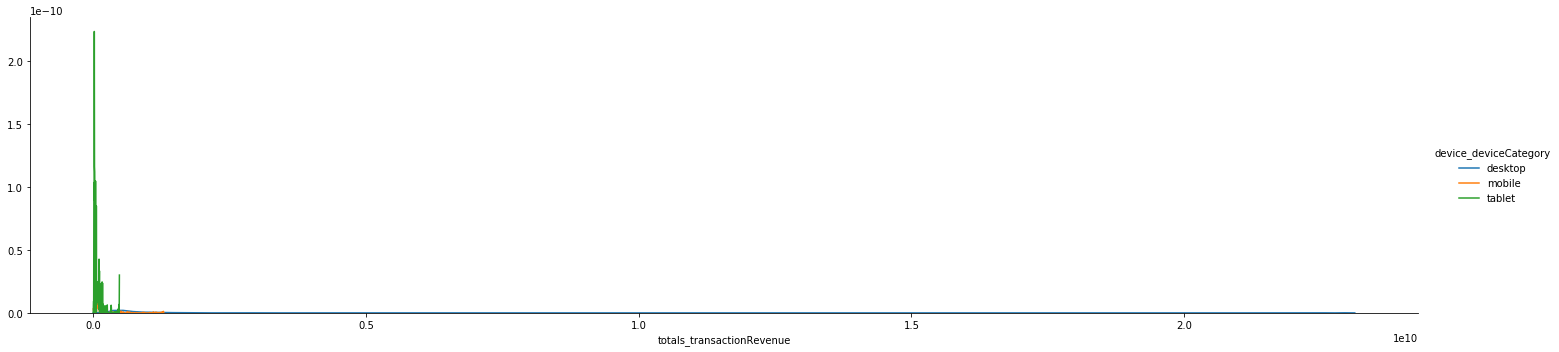

<Figure size 1080x720 with 0 Axes>

In [171]:
f = sns.FacetGrid(train,hue='device_deviceCategory',size=5,aspect=4)
plt.figure(figsize=(15,10))
f.map(sns.kdeplot,'totals_transactionRevenue',shade= True)
f.add_legend()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



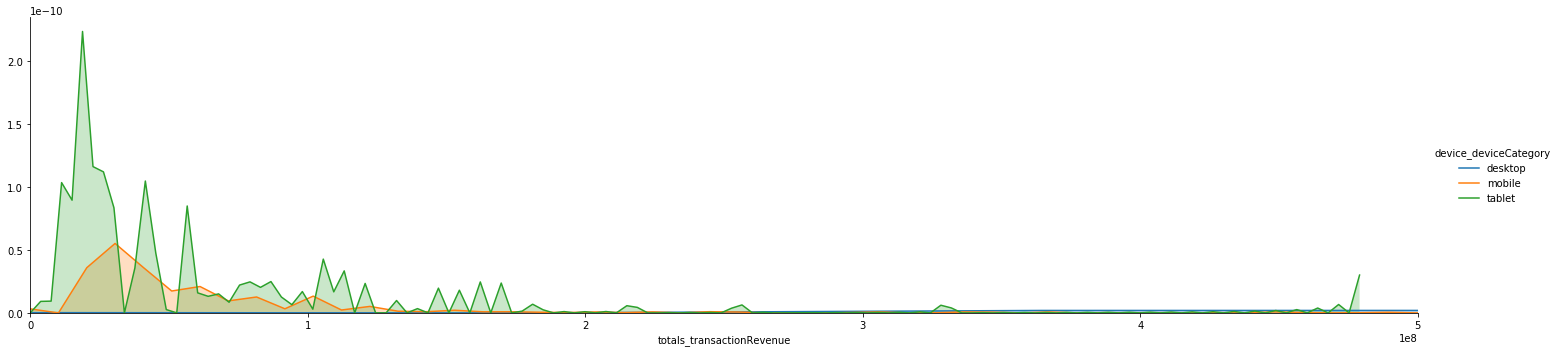

<Figure size 1080x720 with 0 Axes>

In [172]:
f = sns.FacetGrid(train,hue='device_deviceCategory',size=5,aspect=4)
plt.xlim(0, 500000000)
plt.figure(figsize=(15,10))
f.map(sns.kdeplot,'totals_transactionRevenue',shade= True)
f.add_legend()

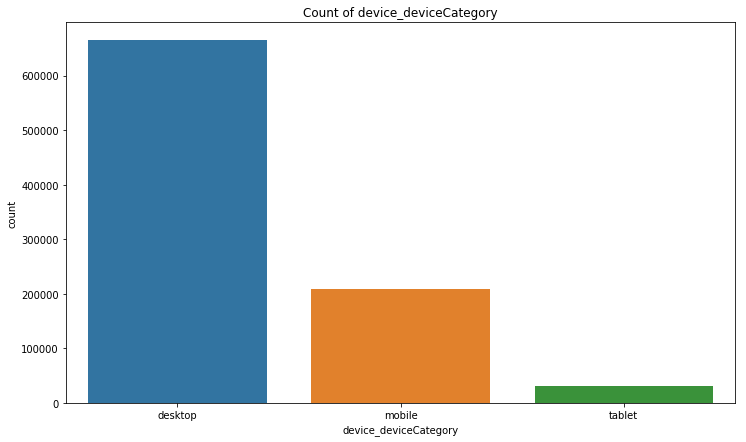

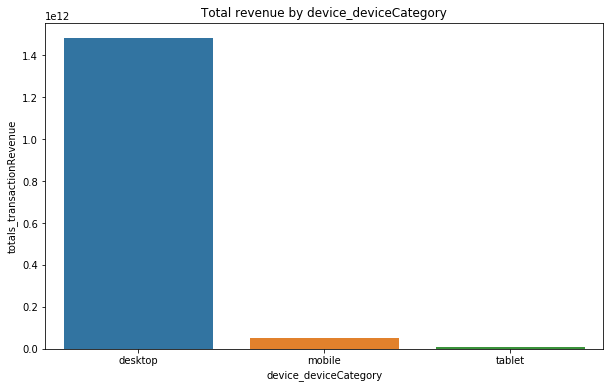

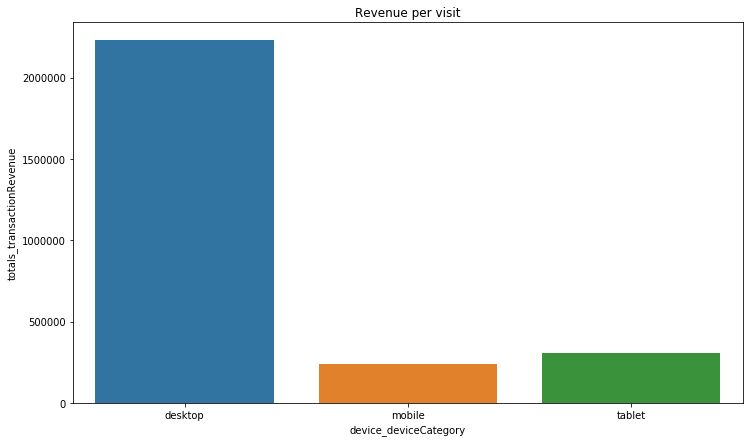

In [173]:
plot_colCount(train,'device_deviceCategory',0)
plot_totalRevenue(train,'device_deviceCategory',0,10,6)
plot_revenuePerUnitCol(train,'device_deviceCategory',0)

- Desktops generate the highest visits and revenue 
- Desktops generate the most high revenue transactions
- Desktops generate almost 8 times the revenue per visit compared to tablets and mobile
- Tablets generate the least total revenue 
- Tablets generate a high number of low revenue transactions

### device_isMobile

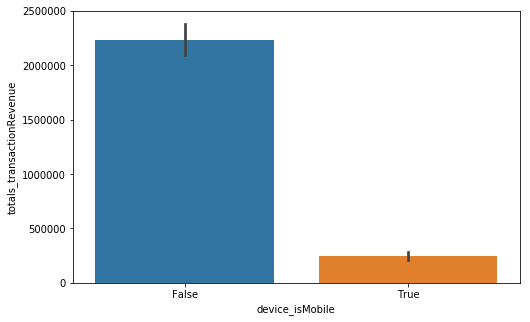

In [174]:
plt.figure(figsize=(8,5))
sns.barplot(data =train,x='device_isMobile',y='totals_transactionRevenue')

### device_operatingSystem

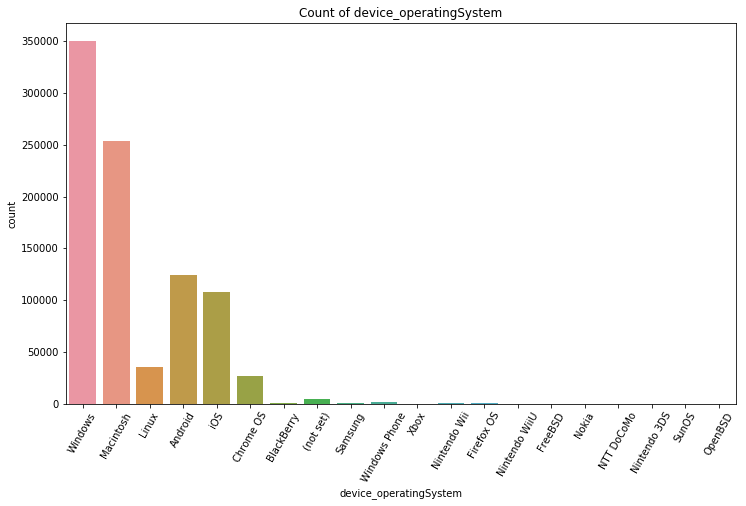

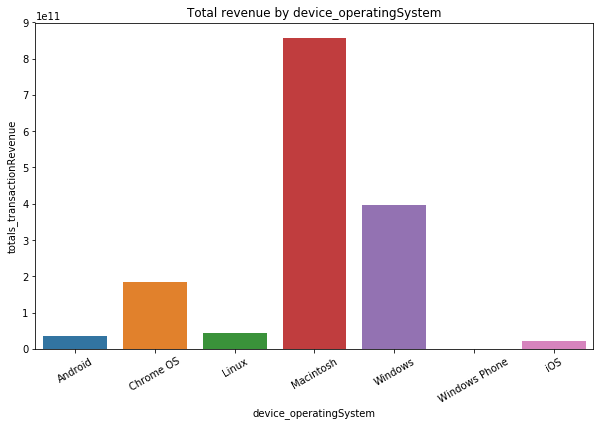

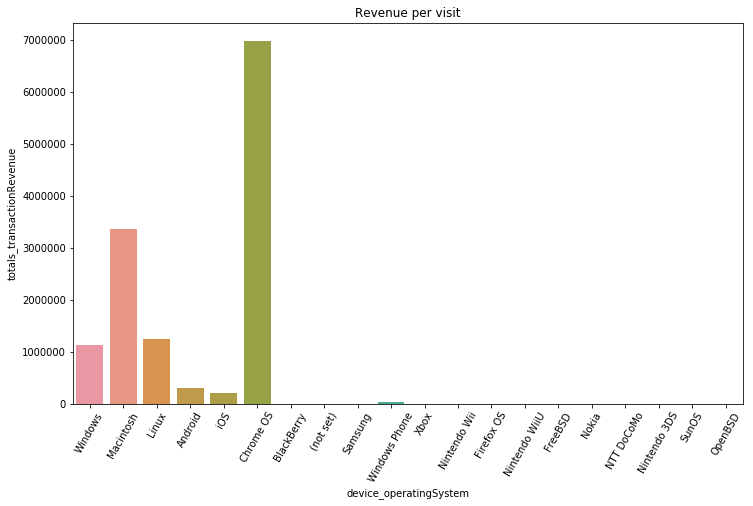

In [175]:
plot_colCount(train,'device_operatingSystem',60)
plot_totalRevenue(train,'device_operatingSystem',30,10,6)
plot_revenuePerUnitCol(train,'device_operatingSystem',60)

Windows is the most popular operating system but Mac generates more revenue. Chrome generates more revenue per visit.

### geoNetwork_city

In [176]:
topCities = train['geoNetwork_city'].value_counts().head(50).reset_index()
topCities.columns = ['city','count']
topCities = topCities[topCities.city !='not available in demo dataset']
topCities = topCities[topCities.city !='(not set)']
topCitiesTrain = train[train['geoNetwork_city'].isin(topCities['city'])]

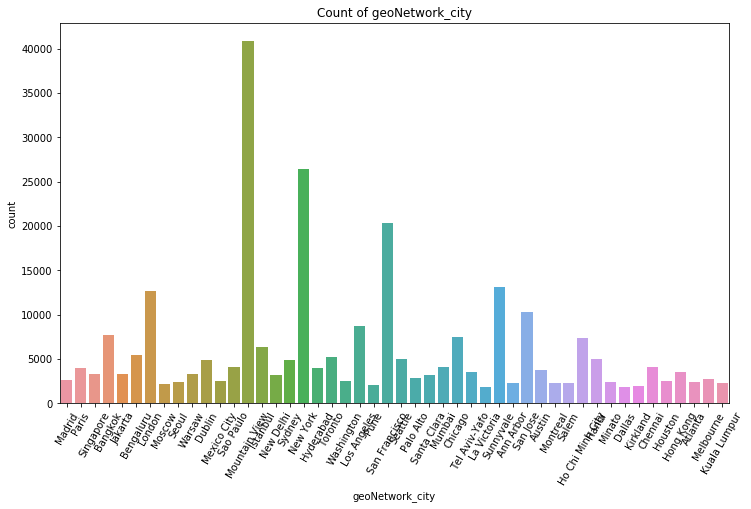

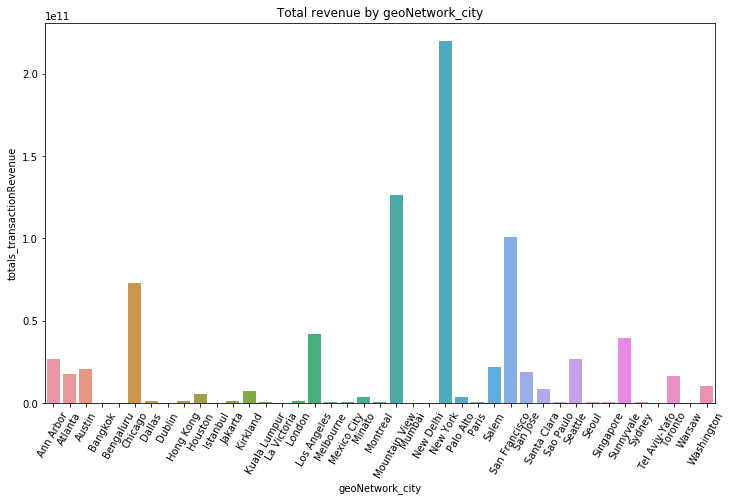

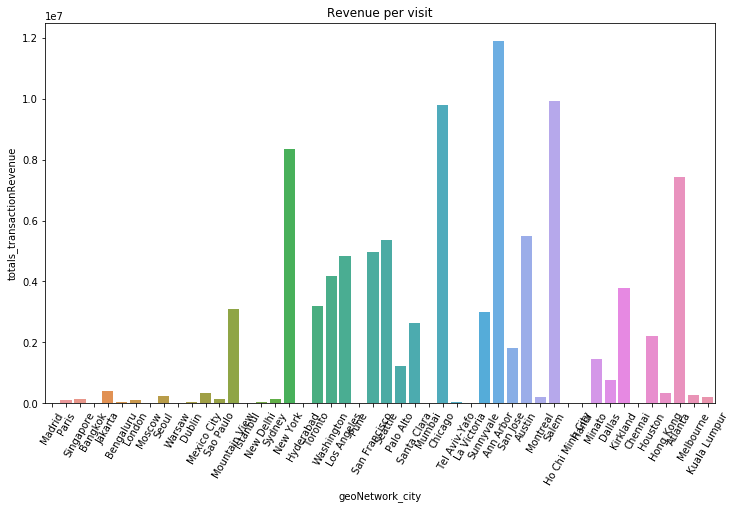

In [177]:
plot_colCount(topCitiesTrain,'geoNetwork_city',60)
plot_totalRevenue(topCitiesTrain,'geoNetwork_city',60)
plot_revenuePerUnitCol(topCitiesTrain,'geoNetwork_city',60)
del topCities
del topCitiesTrain

### geoNetwork_continent

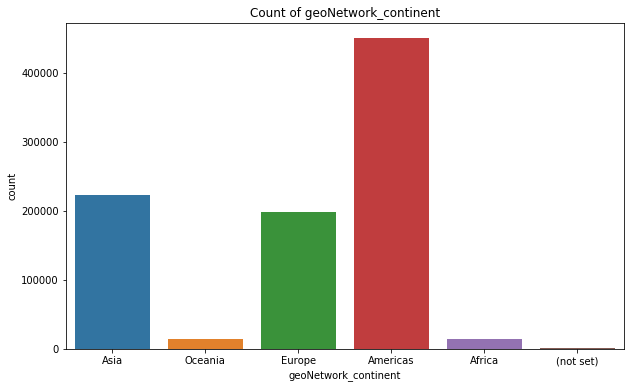

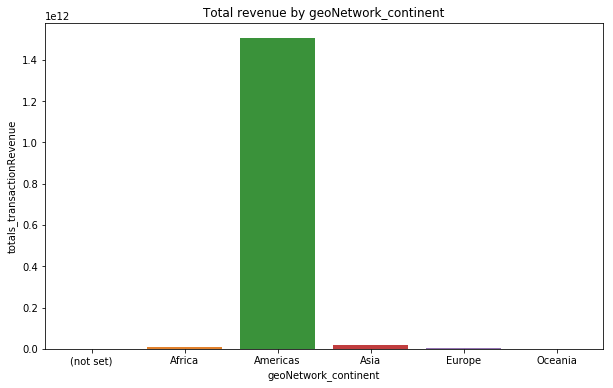

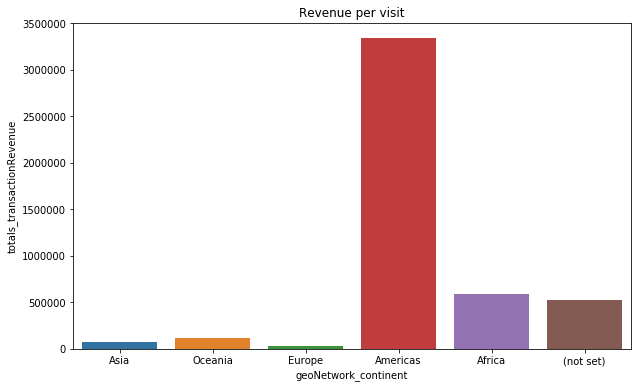

In [178]:
plot_colCount(train,'geoNetwork_continent',0,10,6)
plot_totalRevenue(train,'geoNetwork_continent',0,10,6)
plot_revenuePerUnitCol(train,'geoNetwork_continent',0,10,6)

### geoNetwork_country

In [179]:
byCountry = train.groupby('geoNetwork_country',as_index=False).agg({'visitId':'count','totals_transactionRevenue':'sum'}).rename(columns={'visitId':'visits','totals_transactionRevenue':'totalRevenue'})

In [180]:
import matplotlib.pyplot as plt
from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot
import plotly.graph_objs as go
import cufflinks as cf

In [181]:
init_notebook_mode(connected=True)
cf.go_offline()

In [182]:
data=dict(type='choropleth',
         locations = byCountry['geoNetwork_country'],
         locationmode = 'country names',
         colorscale = 'Blues',
         reversescale=True,
         text = ['text 1','text 2','text 3'],
         z=byCountry['visits'],
         colorbar={'title':'Total visits'})

layout = dict(title='Visit count by Country')

choromap = go.Figure(data=[data])
iplot(choromap)


In [183]:
data=dict(type='choropleth',
         locations = byCountry['geoNetwork_country'],
         locationmode = 'country names',
         colorscale = 'Blues',
         reversescale=True,
         text = ['text 1','text 2','text 3'],
         z=byCountry['totalRevenue'],
         colorbar={'title':'Total revenue'})

layout = dict(title='Total revenue by Country')

choromap = go.Figure(data=[data])
iplot(choromap)

In [184]:
topCountries = train['geoNetwork_country'].value_counts().head(80).reset_index()
topCountries.columns = ['country','count']
topCountriesTrain = train[train['geoNetwork_country'].isin(topCountries['country'])]

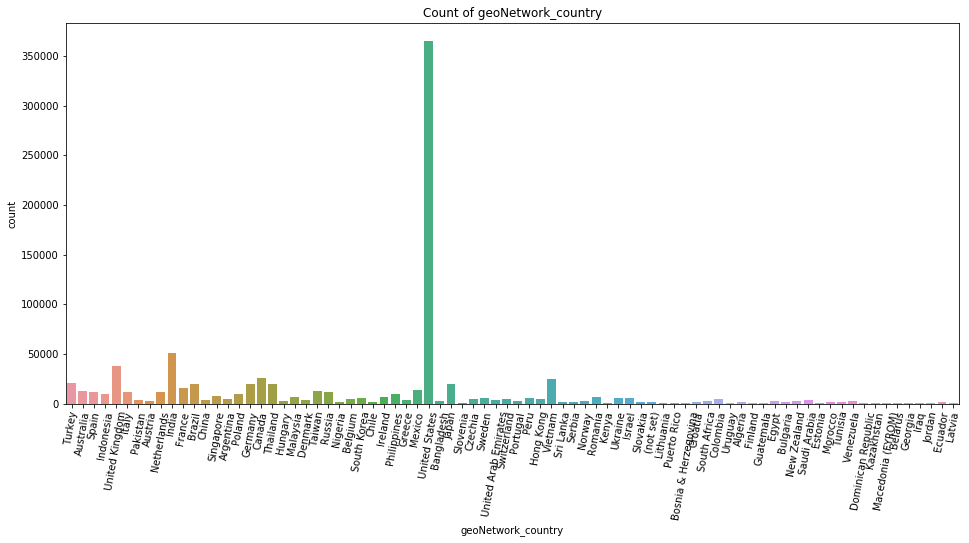

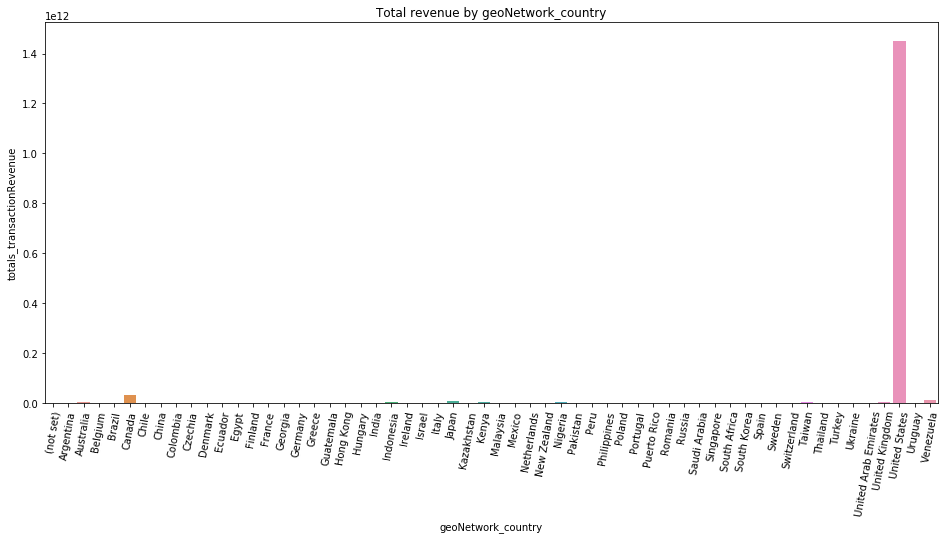

In [185]:
plot_colCount(topCountriesTrain,'geoNetwork_country',80,16)
plot_totalRevenue(topCountriesTrain,'geoNetwork_country',80,16)


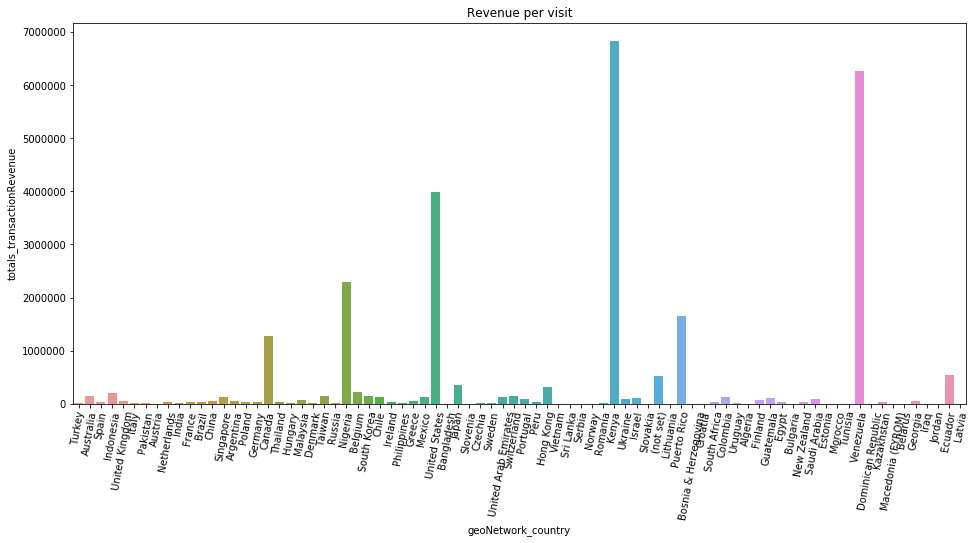

In [186]:
plot_revenuePerUnitCol(topCountriesTrain,'geoNetwork_country',80,16)
del topCountries
del topCountriesTrain

- United States generates the highest number of visits and revenue
- Surprisingly, Venezuela and Kenya generate the highest revenue per visit

In [187]:
topCountries = train['geoNetwork_country'].value_counts().head(8).index

In [188]:
def plotByCountry(plotCol,n_labels = 0, xtick=0,plotType = 'line',order=0):
    groupByCountry = train.groupby(['geoNetwork_country',plotCol],as_index=False).count()[['geoNetwork_country',plotCol,'visitId']]
    groupByCountry = groupByCountry[groupByCountry['geoNetwork_country'].isin(topCountries)]
    if n_labels != 0:
        topLabels = train[plotCol].value_counts().head(n_labels).index
        groupByCountry = groupByCountry[groupByCountry[plotCol].isin(topLabels)]
    groupByCountry.columns = ['geoNetwork_country', plotCol, 'visits']
    plt.figure(figsize=[14,10])
    plt.xticks(rotation=xtick)
    if plotType == 'line':
        sns.lineplot(data=groupByCountry,x=plotCol,y='visits',hue='geoNetwork_country')
    if plotType == 'bar':
        if order == 0:
            sns.barplot(data=groupByCountry,x=plotCol,y='visits',hue='geoNetwork_country')
        if order == 1:
            sns.barplot(data=groupByCountry,x='geoNetwork_country',y='visits',hue=plotCol)

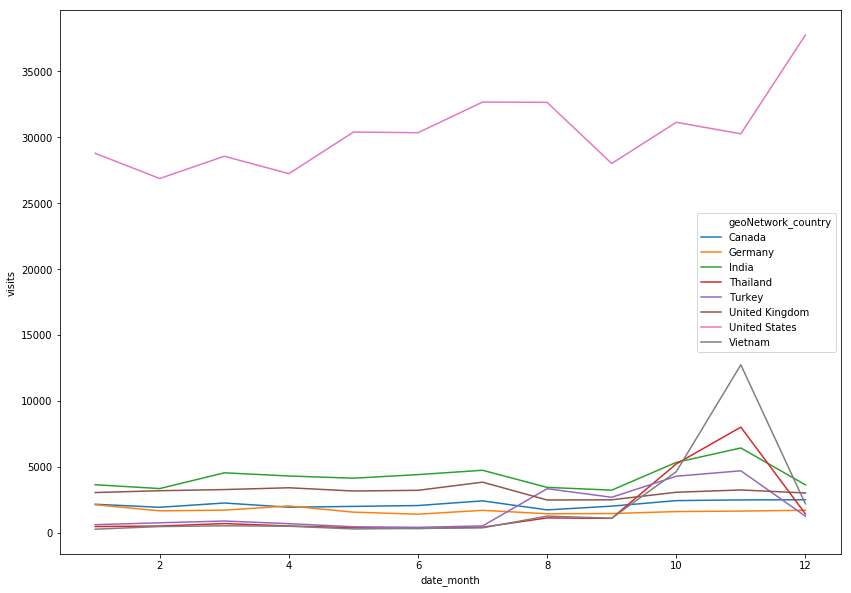

In [189]:
plotByCountry('date_month')

- There is a significant spike in traffic from Vietnam between October and December
- Thailand also shows a similar pattern
- Most countries show a spike in summer and holiday season
- Germany and Canada show very little seasonal fluctuation
- United Kingdom is the only country where the most visits occur outside the November to January period 

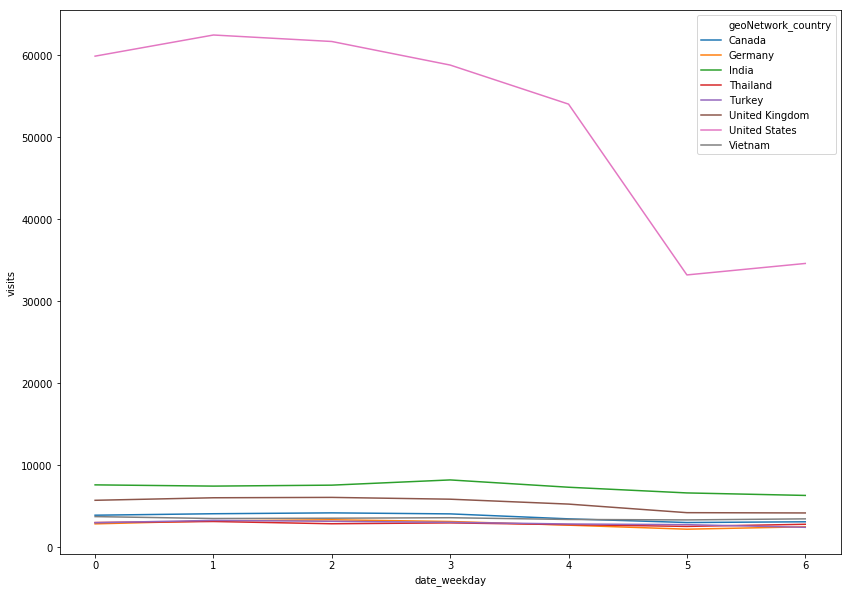

In [190]:
plotByCountry('date_weekday')

- There is a significant difference in traffic from United States between weedkays and weekends. Other countries do not show this pattern

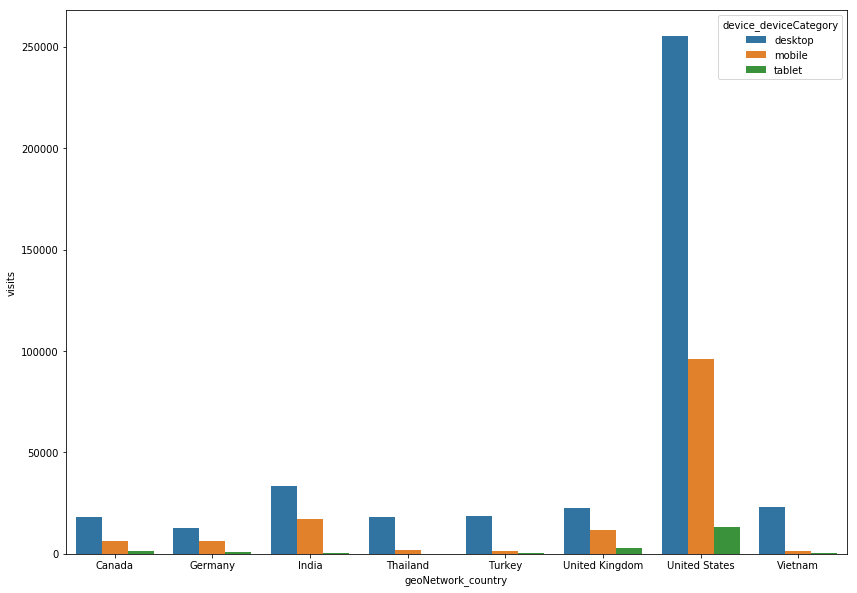

In [191]:
plotByCountry('device_deviceCategory',plotType='bar',order=1)

- India and Thailand have very low desktop to tablet ratio. Tablets don't seem to be popular in these countries
- Vietnam has the least desktop to mobile ratio

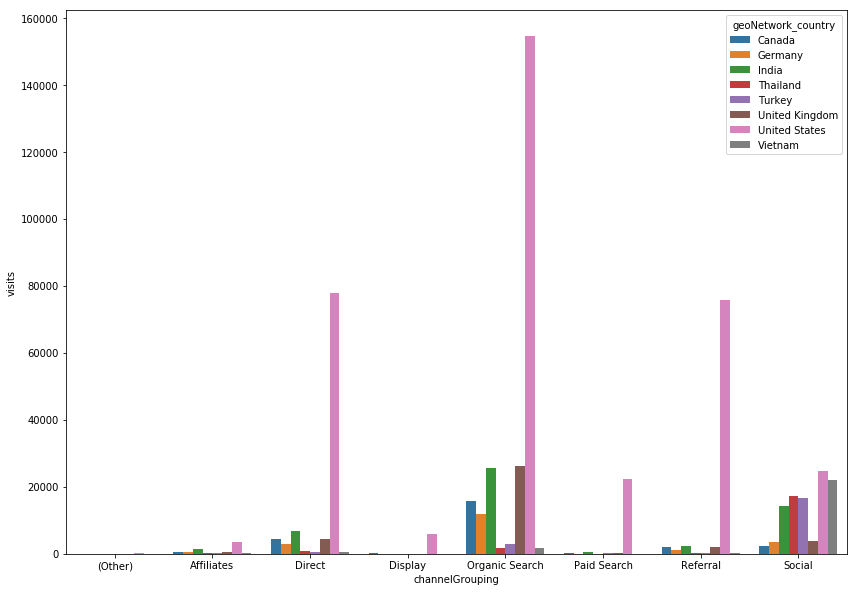

In [192]:
plotByCountry('channelGrouping',plotType='bar')

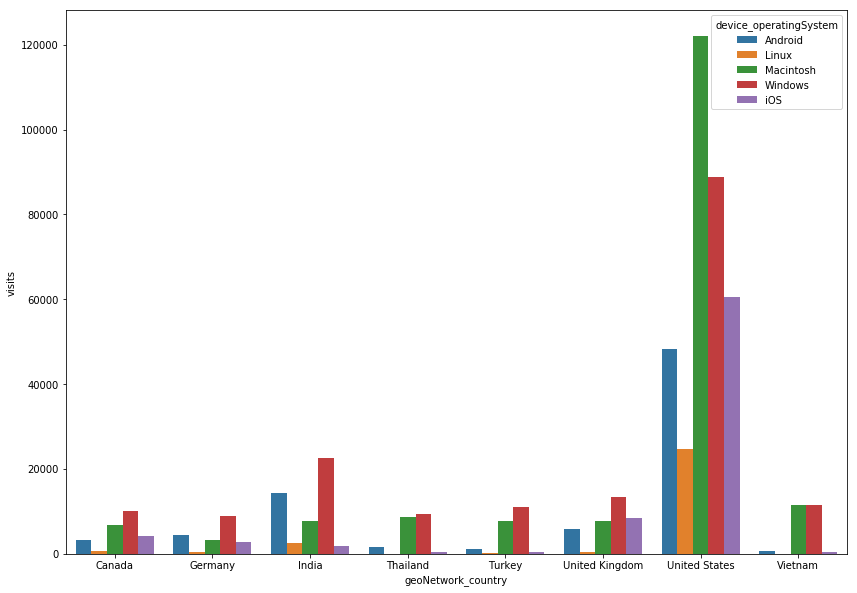

In [193]:
plotByCountry('device_operatingSystem',n_labels=5,plotType='bar',order=1)

- Mac is the leader in United States.It has a significant presence in Thailand and Vietnam but lags in other countries
- Windows is the leader in all countries except United States
- Countries with more iOS traffic than Android: United States, Canada, United Kingdom

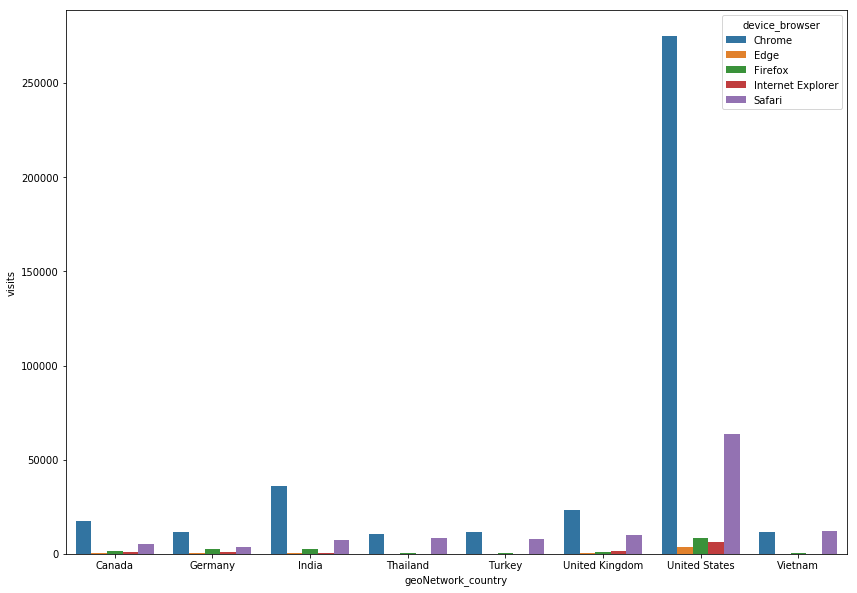

In [194]:
plotByCountry('device_browser',plotType='bar',n_labels=5,order=1)

- As discussed above, Vietnam and Thailand have high Mac adoption and this could be the reason why they have almost equal traffic from Chrome and Safari

### geoNetwork_metro

In [195]:
topMetrosTrain = train[~train['geoNetwork_metro'].isin(['not available in demo dataset','(not set)'])]

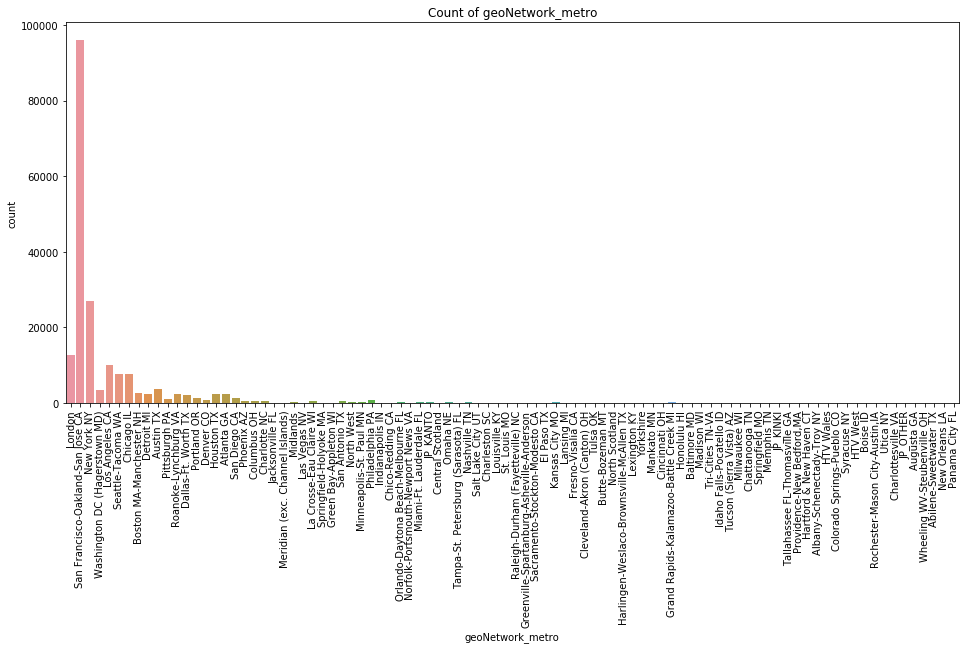

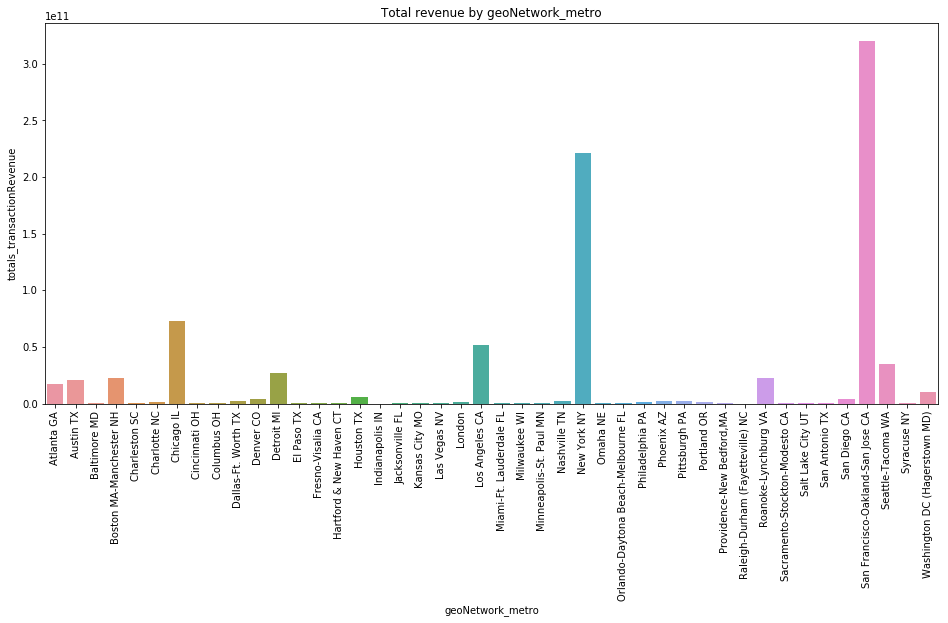

In [196]:
plot_colCount(topMetrosTrain,'geoNetwork_metro',90,16)
plot_totalRevenue(topMetrosTrain,'geoNetwork_metro',90,16)

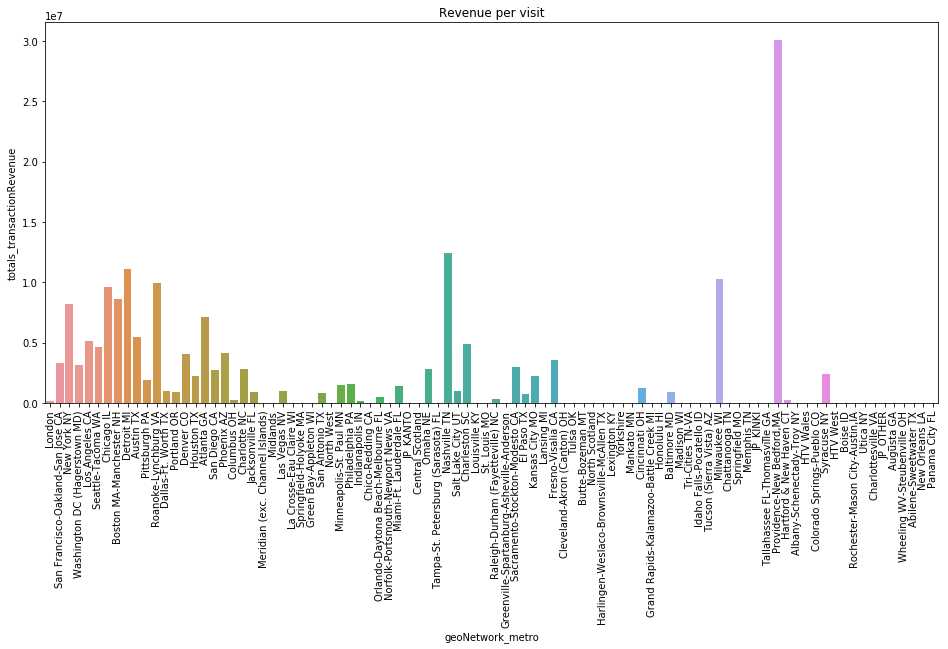

In [197]:
plot_revenuePerUnitCol(topMetrosTrain,'geoNetwork_metro',90,16)

### geoNetwork_region

In [198]:
topRegions = train['geoNetwork_region'].value_counts().head(80).reset_index()
topRegions.columns = ['region','count']
topRegions = topRegions[(topRegions.region !='not available in demo dataset') &(topRegions.region !='(not set)')]
topRegionsTrain = train[train['geoNetwork_region'].isin(topRegions['region'])]

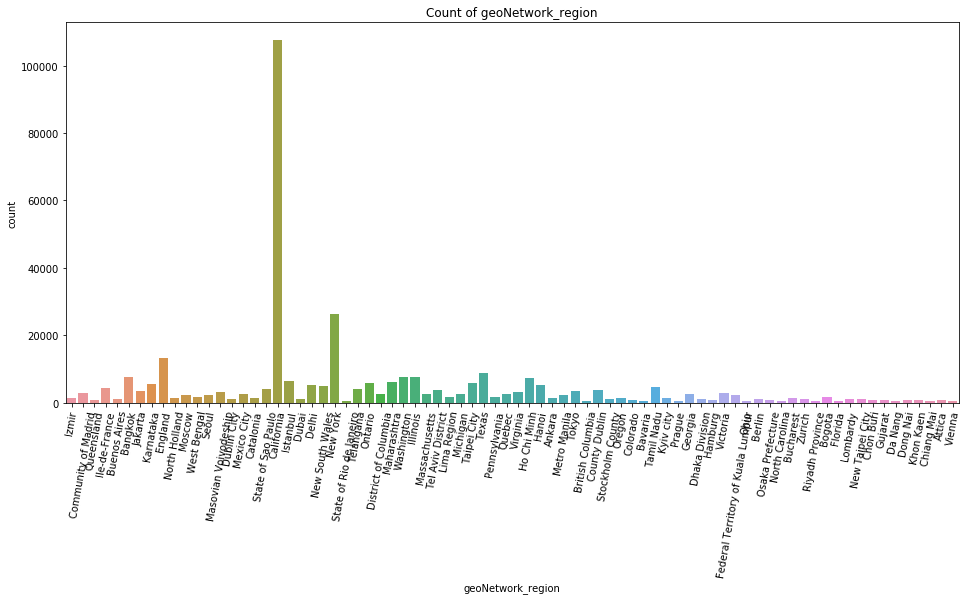

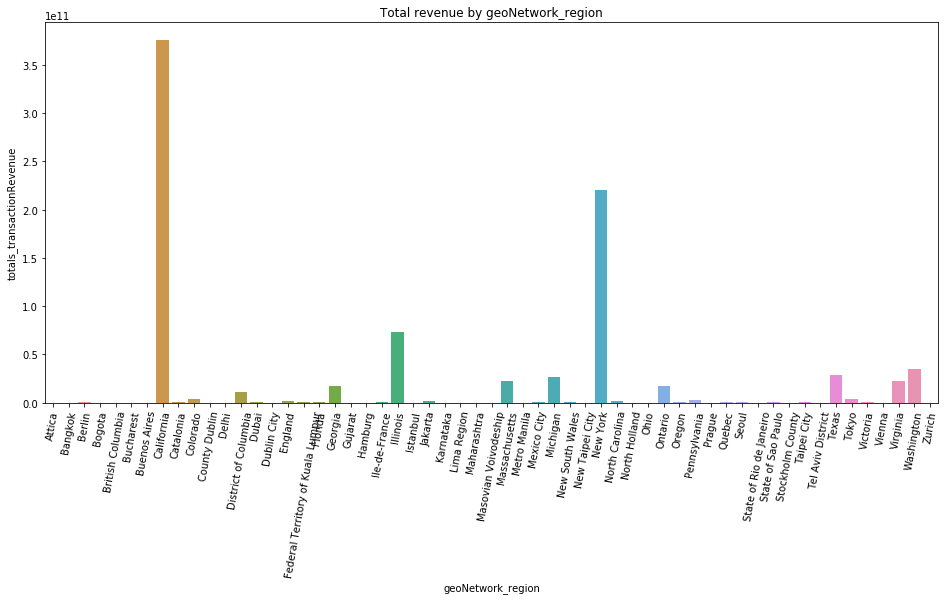

In [199]:
plot_colCount(topRegionsTrain,'geoNetwork_region',80,16)
plot_totalRevenue(topRegionsTrain,'geoNetwork_region',80,16)

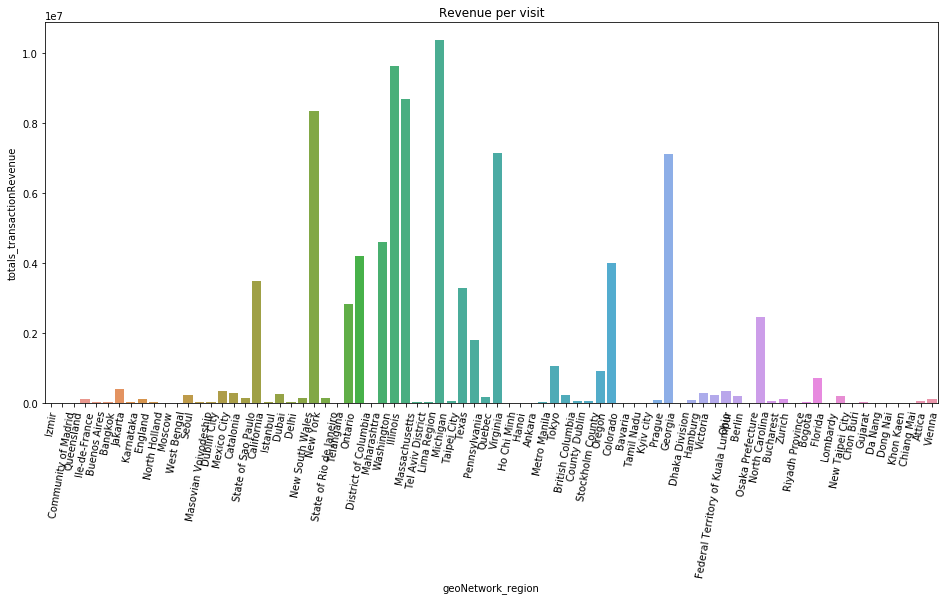

In [200]:
plot_revenuePerUnitCol(topRegionsTrain,'geoNetwork_region',80,16)
del topRegions
del topRegionsTrain

### geoNetwork_subContinent

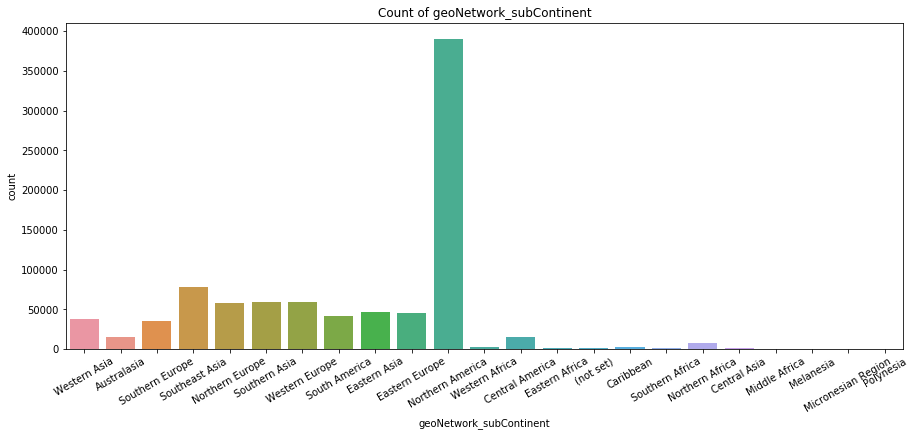

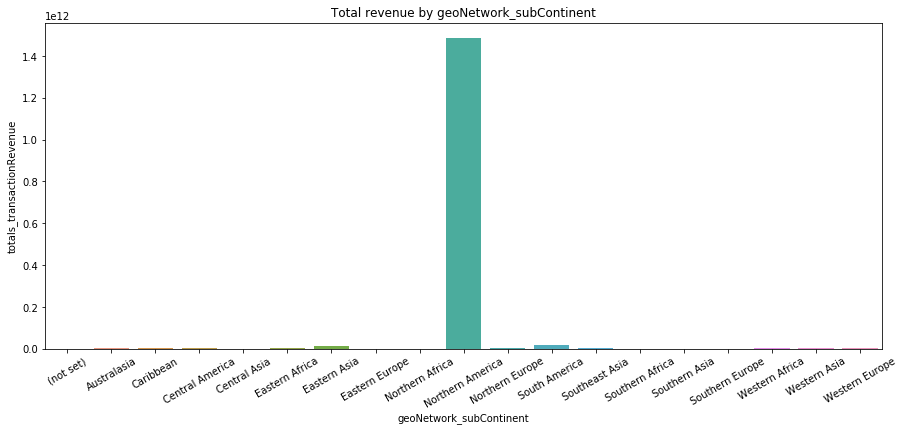

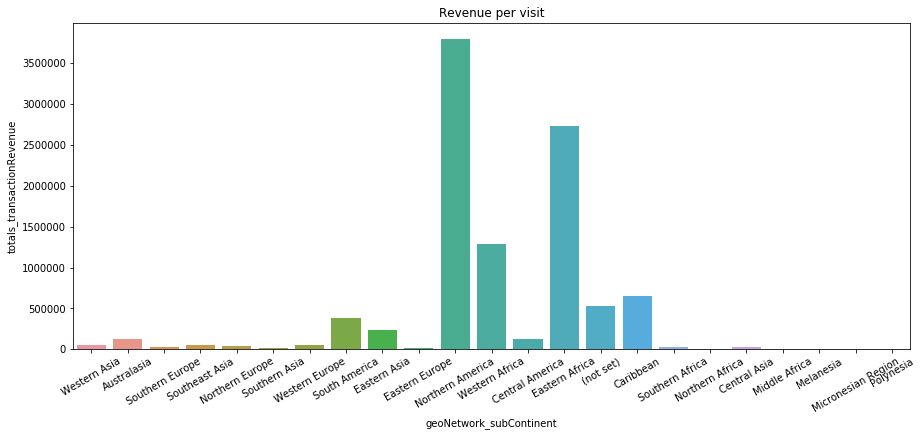

In [201]:
plot_colCount(train,'geoNetwork_subContinent',30,15,6)
plot_totalRevenue(train,'geoNetwork_subContinent',30,15,6)
plot_revenuePerUnitCol(train,'geoNetwork_subContinent',30,15,6)

### totals_bounces

In [202]:
train['totals_bounces'].fillna(0,inplace=True)
train['totals_bounces'] = train['totals_bounces'].astype('int64')

### totals_newVisits

In [203]:
train['totals_newVisits'].fillna(0,inplace=True)
train['totals_newVisits'] = train['totals_newVisits'].astype('int64')

### totals_hits

In [204]:
train['totals_hits'] = train['totals_hits'].astype('int64')

### totals_pageviews

In [205]:
#totals_pageviews
train['totals_pageviews'] = train['totals_pageviews'].astype(float)
print(train['totals_pageviews'].min())
print(train['totals_pageviews'].max())
train['totals_pageviews'].fillna(0,inplace=True)

1.0
469.0


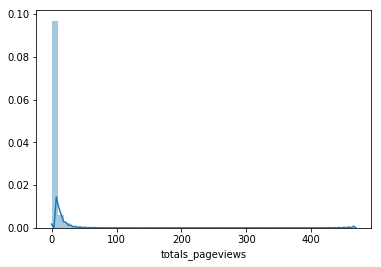

In [206]:
sns.distplot(train['totals_pageviews'])

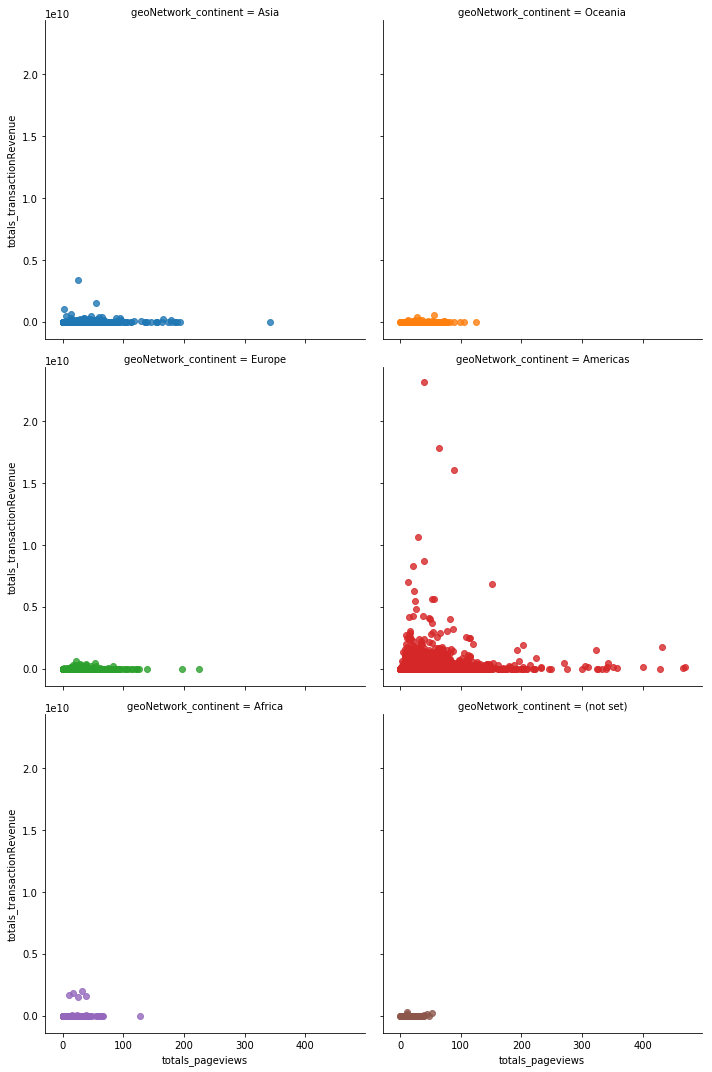

In [207]:
sns.lmplot(data=train,x='totals_pageviews',y='totals_transactionRevenue',
           hue='geoNetwork_continent',col='geoNetwork_continent',col_wrap=2,fit_reg=False)

### Traffic Source Columns

There are 3 Traffic Source related columns that do not have any null values.
trafficSource_campaign
trafficSource_medium
trafficSource_source

In [208]:
train['trafficSource_campaign'].value_counts()

(not set)                                          865347
Data Share Promo                                    16403
AW - Dynamic Search Ads Whole Site                  14244
AW - Accessories                                     7070
test-liyuhz                                           392
AW - Electronics                                       96
Retail (DO NOT EDIT owners nophakun and tianyu)        50
AW - Apparel                                           46
All Products                                            4
Data Share                                              1
Name: trafficSource_campaign, dtype: int64

Though trafficsource_campaign does not contain any null values, there are many unknowns.

In [209]:
train['trafficSource_medium'].value_counts()

organic      381561
referral     330955
(none)       143026
cpc           25326
affiliate     16403
cpm            6262
(not set)       120
Name: trafficSource_medium, dtype: int64

In [210]:
train['trafficSource_medium'].replace('(not set)','none',inplace=True)
train['trafficSource_medium'].replace('(none)','none',inplace=True)

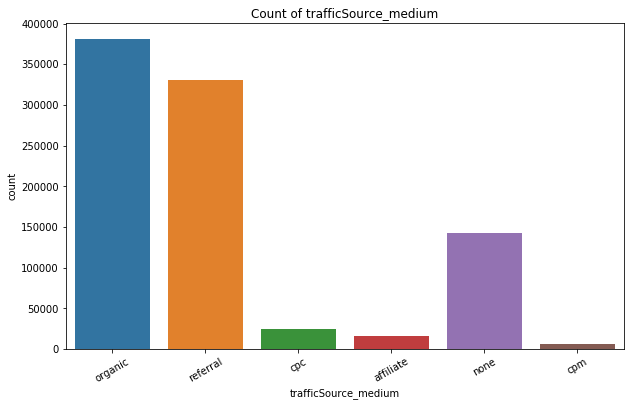

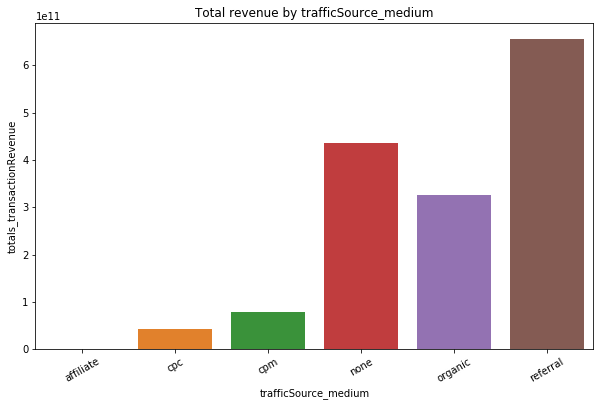

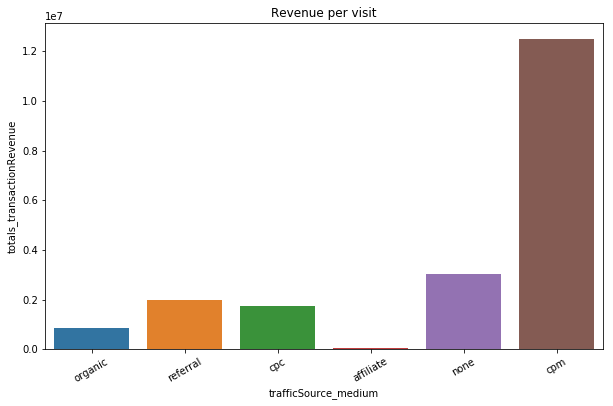

In [211]:
plot_colCount(train,'trafficSource_medium',30,10,6)
plot_totalRevenue(train,'trafficSource_medium',30,10,6)
plot_revenuePerUnitCol(train,'trafficSource_medium',30,10,6)

In [212]:
train['trafficSource_source'].value_counts().head()

google                 400788
youtube.com            212602
(direct)               143028
mall.googleplex.com     66416
Partners                16411
Name: trafficSource_source, dtype: int64

In [213]:
#trafficSource_adwordsClickInfo.isVideoAd
train['trafficSource_adwordsClickInfo.isVideoAd'].unique()

array([nan, False], dtype=object)

Not enough information. All non-values are 'False'. Dropping column.

In [214]:
train.drop(['trafficSource_adwordsClickInfo.isVideoAd'],axis=1,inplace=True)

In [215]:
#trafficSource_isTrueDirect
train['trafficSource_isTrueDirect'].fillna(0,inplace=True)
train['trafficSource_isTrueDirect'].replace(True,1,inplace=True)
train['trafficSource_isTrueDirect']=train['trafficSource_isTrueDirect'].astype(bool)

In [216]:
#trafficSource_adContent
train['trafficSource_adContent'].fillna('Unknown',inplace=True)

In [217]:
#trafficSource_adwordsClickInfo.adNetworkType
train['trafficSource_adwordsClickInfo.adNetworkType'].value_counts()
train['trafficSource_adwordsClickInfo.adNetworkType'].fillna('Unknown',inplace=True)

In [218]:
#trafficSource_adwordsClickInfo.gclId
train['trafficSource_adwordsClickInfo.gclId'].fillna('Unknown',inplace=True)

In [219]:
#trafficSource_adwordsClickInfo.page
train['trafficSource_adwordsClickInfo.page'].fillna(0,inplace=True)
train['trafficSource_adwordsClickInfo.page'] = train['trafficSource_adwordsClickInfo.page'].astype('int64')

In [220]:
#trafficSource_referralPath
train['trafficSource_referralPath'].fillna(0,inplace=True)

In [221]:
#trafficSource_adwordsClickInfo.slot
train['trafficSource_adwordsClickInfo.slot'].value_counts()

Top    20956
RHS      504
Name: trafficSource_adwordsClickInfo.slot, dtype: int64

In [222]:
train.drop(['trafficSource_adwordsClickInfo.slot'],axis=1,inplace=True)

In [223]:
#trafficSource_keyword
train['trafficSource_keyword'].fillna(0,inplace=True)

In [224]:
train.drop(['sessionId',
            'visitId','visitStartTime',
            'geoNetwork_region'],axis=1,inplace=True)

### Test Set

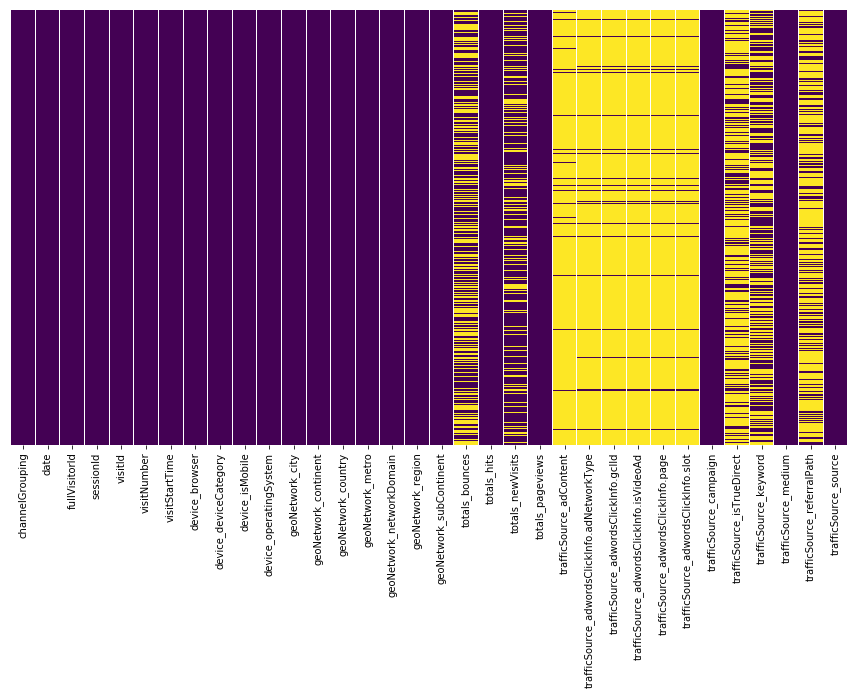

In [225]:
test.drop(['socialEngagementType',
'device_browserSize',
'device_browserVersion',
'device_flashVersion',
'device_language',
'device_mobileDeviceBranding',
'device_mobileDeviceInfo',
'device_mobileDeviceMarketingName',
'device_mobileDeviceModel',
'device_mobileInputSelector',
'device_operatingSystemVersion',
'device_screenColors',
'device_screenResolution',
'geoNetwork_cityId',
'geoNetwork_latitude',
'geoNetwork_longitude',
'geoNetwork_networkLocation',
'totals_visits',
'trafficSource_adwordsClickInfo.criteriaParameters'],axis=1,inplace=True)

plt.figure(figsize=(15,8))
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [226]:
test['date'] = pd.to_datetime(test['date'],format='%Y%m%d')
test['date_year'],test['date_month'],test['date_weekday'] = test['date'].dt.year,test['date'].dt.month,test['date'].dt.weekday
test.drop('date',axis=1,inplace=True)

In [227]:
test['totals_bounces'].fillna(0,inplace=True)
test['totals_bounces'] = test['totals_bounces'].astype('int64')
test['totals_newVisits'].fillna(0,inplace=True)
test['totals_newVisits'] = test['totals_newVisits'].astype('int64')
test['totals_hits'] = test['totals_hits'].astype('int64')
test['totals_pageviews'] = test['totals_pageviews'].astype(float)
test['totals_pageviews'].fillna(0,inplace=True)
test['trafficSource_medium'].replace('(not set)','none',inplace=True)
test['trafficSource_medium'].replace('(none)','none',inplace=True)
test.drop(['trafficSource_adwordsClickInfo.isVideoAd'],axis=1,inplace=True)
test['trafficSource_isTrueDirect'].fillna(0,inplace=True)
test['trafficSource_isTrueDirect'].replace(True,1,inplace=True)
test['trafficSource_isTrueDirect']=test['trafficSource_isTrueDirect'].astype(bool)
test['trafficSource_adContent'].fillna('Unknown',inplace=True)
test['trafficSource_adwordsClickInfo.adNetworkType'].fillna('Unknown',inplace=True)
test['trafficSource_adwordsClickInfo.gclId'].fillna('Unknown',inplace=True)
test['trafficSource_adwordsClickInfo.page'].fillna(0,inplace=True)
test['trafficSource_adwordsClickInfo.page'] = test['trafficSource_adwordsClickInfo.page'].astype('int64')
test['trafficSource_referralPath'].fillna(0,inplace=True)
test.drop(['trafficSource_adwordsClickInfo.slot'],axis=1,inplace=True)
test['trafficSource_keyword'].fillna(0,inplace=True)
test.drop(['sessionId',
            'visitId','visitStartTime',
            'geoNetwork_region'],axis=1,inplace=True)

In [228]:
test.columns

Index(['channelGrouping', 'fullVisitorId', 'visitNumber', 'device_browser',
       'device_deviceCategory', 'device_isMobile', 'device_operatingSystem',
       'geoNetwork_city', 'geoNetwork_continent', 'geoNetwork_country',
       'geoNetwork_metro', 'geoNetwork_networkDomain',
       'geoNetwork_subContinent', 'totals_bounces', 'totals_hits',
       'totals_newVisits', 'totals_pageviews', 'trafficSource_adContent',
       'trafficSource_adwordsClickInfo.adNetworkType',
       'trafficSource_adwordsClickInfo.gclId',
       'trafficSource_adwordsClickInfo.page', 'trafficSource_campaign',
       'trafficSource_isTrueDirect', 'trafficSource_keyword',
       'trafficSource_medium', 'trafficSource_referralPath',
       'trafficSource_source', 'date_year', 'date_month', 'date_weekday'],
      dtype='object')

## Categorical Variables

In [229]:
from sklearn import preprocessing
encoder = preprocessing.OneHotEncoder()

In [230]:
train.columns

Index(['channelGrouping', 'fullVisitorId', 'visitNumber', 'device_browser',
       'device_deviceCategory', 'device_isMobile', 'device_operatingSystem',
       'geoNetwork_city', 'geoNetwork_continent', 'geoNetwork_country',
       'geoNetwork_metro', 'geoNetwork_networkDomain',
       'geoNetwork_subContinent', 'totals_bounces', 'totals_hits',
       'totals_newVisits', 'totals_pageviews', 'totals_transactionRevenue',
       'trafficSource_adContent',
       'trafficSource_adwordsClickInfo.adNetworkType',
       'trafficSource_adwordsClickInfo.gclId',
       'trafficSource_adwordsClickInfo.page', 'trafficSource_campaign',
       'trafficSource_isTrueDirect', 'trafficSource_keyword',
       'trafficSource_medium', 'trafficSource_referralPath',
       'trafficSource_source', 'date_year', 'date_month', 'date_weekday'],
      dtype='object')

In [231]:
test.columns

Index(['channelGrouping', 'fullVisitorId', 'visitNumber', 'device_browser',
       'device_deviceCategory', 'device_isMobile', 'device_operatingSystem',
       'geoNetwork_city', 'geoNetwork_continent', 'geoNetwork_country',
       'geoNetwork_metro', 'geoNetwork_networkDomain',
       'geoNetwork_subContinent', 'totals_bounces', 'totals_hits',
       'totals_newVisits', 'totals_pageviews', 'trafficSource_adContent',
       'trafficSource_adwordsClickInfo.adNetworkType',
       'trafficSource_adwordsClickInfo.gclId',
       'trafficSource_adwordsClickInfo.page', 'trafficSource_campaign',
       'trafficSource_isTrueDirect', 'trafficSource_keyword',
       'trafficSource_medium', 'trafficSource_referralPath',
       'trafficSource_source', 'date_year', 'date_month', 'date_weekday'],
      dtype='object')

### One Hot Encoding Variables

In [232]:
#combined = pd.get_dummies(pd.concat([train,test],keys=['tr','ts']),columns=['device_deviceCategory','geoNetwork_continent',
#                                      'trafficSource_adwordsClickInfo.adNetworkType',
#                                      'channelGrouping','date_month','date_weekday'])

In [233]:
#combined.drop(['geoNetwork_continent_(not set)','trafficSource_adwordsClickInfo.adNetworkType_Unknown'],axis=1,inplace=True)

### Label Encoding

In [234]:
combined = pd.concat([train,test],keys=['tr','ts'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False




In [235]:
leColumns = ['device_deviceCategory','geoNetwork_continent','trafficSource_adwordsClickInfo.adNetworkType',
                'channelGrouping','date_month','date_weekday','geoNetwork_subContinent','trafficSource_medium',
                'geoNetwork_city','geoNetwork_networkDomain','trafficSource_adContent','trafficSource_campaign',
                'trafficSource_keyword','trafficSource_source','device_operatingSystem','device_browser', 
             'geoNetwork_metro','geoNetwork_country','trafficSource_referralPath' ,
             'trafficSource_adwordsClickInfo.gclId']


for col in leColumns:
    print('Processing column ' + col)
    le = preprocessing.LabelEncoder()
    le.fit(combined[col].astype(str))
    combined[col] = le.transform(combined[col].astype(str)) 

Processing column device_deviceCategory
Processing column geoNetwork_continent
Processing column trafficSource_adwordsClickInfo.adNetworkType
Processing column channelGrouping
Processing column date_month
Processing column date_weekday
Processing column geoNetwork_subContinent
Processing column trafficSource_medium
Processing column geoNetwork_city
Processing column geoNetwork_networkDomain
Processing column trafficSource_adContent
Processing column trafficSource_campaign
Processing column trafficSource_keyword
Processing column trafficSource_source
Processing column device_operatingSystem
Processing column device_browser
Processing column geoNetwork_metro
Processing column geoNetwork_country
Processing column trafficSource_referralPath
Processing column trafficSource_adwordsClickInfo.gclId


In [236]:
train,test = combined.xs('tr'),combined.xs('ts')
del combined

In [237]:
train.columns

Index(['channelGrouping', 'date_month', 'date_weekday', 'date_year',
       'device_browser', 'device_deviceCategory', 'device_isMobile',
       'device_operatingSystem', 'fullVisitorId', 'geoNetwork_city',
       'geoNetwork_continent', 'geoNetwork_country', 'geoNetwork_metro',
       'geoNetwork_networkDomain', 'geoNetwork_subContinent', 'totals_bounces',
       'totals_hits', 'totals_newVisits', 'totals_pageviews',
       'totals_transactionRevenue', 'trafficSource_adContent',
       'trafficSource_adwordsClickInfo.adNetworkType',
       'trafficSource_adwordsClickInfo.gclId',
       'trafficSource_adwordsClickInfo.page', 'trafficSource_campaign',
       'trafficSource_isTrueDirect', 'trafficSource_keyword',
       'trafficSource_medium', 'trafficSource_referralPath',
       'trafficSource_source', 'visitNumber'],
      dtype='object')

In [238]:
test.columns

Index(['channelGrouping', 'date_month', 'date_weekday', 'date_year',
       'device_browser', 'device_deviceCategory', 'device_isMobile',
       'device_operatingSystem', 'fullVisitorId', 'geoNetwork_city',
       'geoNetwork_continent', 'geoNetwork_country', 'geoNetwork_metro',
       'geoNetwork_networkDomain', 'geoNetwork_subContinent', 'totals_bounces',
       'totals_hits', 'totals_newVisits', 'totals_pageviews',
       'totals_transactionRevenue', 'trafficSource_adContent',
       'trafficSource_adwordsClickInfo.adNetworkType',
       'trafficSource_adwordsClickInfo.gclId',
       'trafficSource_adwordsClickInfo.page', 'trafficSource_campaign',
       'trafficSource_isTrueDirect', 'trafficSource_keyword',
       'trafficSource_medium', 'trafficSource_referralPath',
       'trafficSource_source', 'visitNumber'],
      dtype='object')

## Correlation

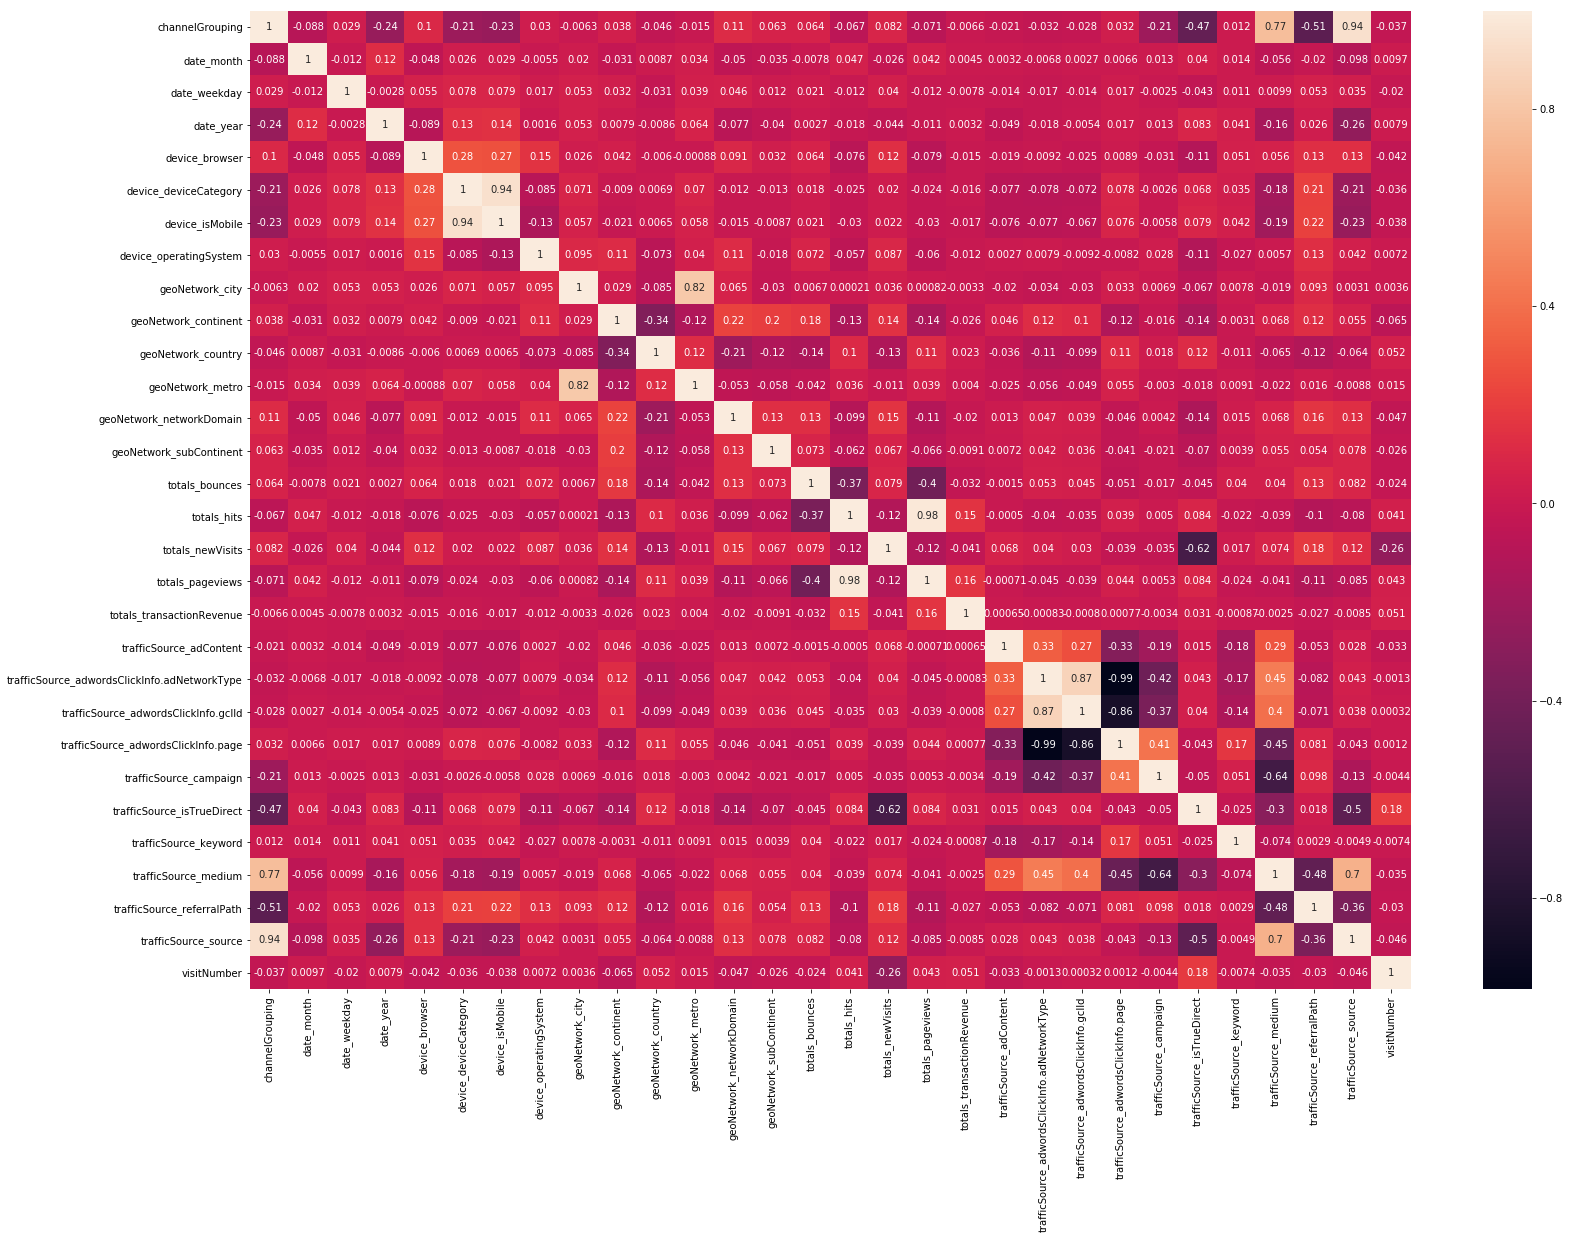

In [239]:
plt.figure(figsize=(26,18))
sns.heatmap(train.corr(),annot=True)

In [240]:
pd.DataFrame(train.corr()['totals_transactionRevenue']).abs().sort_values('totals_transactionRevenue',ascending=False).head(30)

totals_transactionRevenue
totals_transactionRevenue                                      1.000000
totals_pageviews                                               0.155589
totals_hits                                                    0.154333
visitNumber                                                    0.051366
totals_newVisits                                               0.041164
totals_bounces                                                 0.032206
trafficSource_isTrueDirect                                     0.030819
trafficSource_referralPath                                     0.026763
geoNetwork_continent                                           0.025523
geoNetwork_country                                             0.022578
geoNetwork_networkDomain                                       0.020199
device_isMobile                                                0.016555
device_deviceCategory                                          0.015580
device_browser                                                 0.015088
device_operatingSystem                                         0.011925
geoNetwork_subContinent                                        0.009144
trafficSource_source                                           0.008508
date_weekday                                                   0.007812
channelGrouping                                                0.006644
date_month                                                     0.004527
geoNetwork_metro                                               0.003989
trafficSource_campaign                                         0.003375
geoNetwork_city                                                0.003328
date_year                                                      0.003194
trafficSource_medium                                           0.002520
trafficSource_keyword                                          0.000875
trafficSource_adwordsClickInfo.adNetworkType                   0.000835
trafficSource_adwordsClickInfo.gclId                           0.000797
trafficSource_adwordsClickInfo.page                            0.000775
trafficSource_adContent                                        0.000648

In [241]:
#train.drop(['trafficSource_source','geoNetwork_city','totals_hits'],axis=1,inplace=True)
#test.drop(['trafficSource_source','geoNetwork_city','totals_hits'],axis=1,inplace=True)

In [242]:
train.columns

Index(['channelGrouping', 'date_month', 'date_weekday', 'date_year',
       'device_browser', 'device_deviceCategory', 'device_isMobile',
       'device_operatingSystem', 'fullVisitorId', 'geoNetwork_city',
       'geoNetwork_continent', 'geoNetwork_country', 'geoNetwork_metro',
       'geoNetwork_networkDomain', 'geoNetwork_subContinent', 'totals_bounces',
       'totals_hits', 'totals_newVisits', 'totals_pageviews',
       'totals_transactionRevenue', 'trafficSource_adContent',
       'trafficSource_adwordsClickInfo.adNetworkType',
       'trafficSource_adwordsClickInfo.gclId',
       'trafficSource_adwordsClickInfo.page', 'trafficSource_campaign',
       'trafficSource_isTrueDirect', 'trafficSource_keyword',
       'trafficSource_medium', 'trafficSource_referralPath',
       'trafficSource_source', 'visitNumber'],
      dtype='object')

## Extract X and y

In [243]:
import math
from sklearn.model_selection import train_test_split

In [244]:
X = train.drop(['totals_transactionRevenue','fullVisitorId'],axis=1)
y = train['totals_transactionRevenue'].apply(lambda x:0 if x==0 else math.log(x))    

In [245]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.00001,random_state=10)

In [246]:
print(len(X_train))
print(len(X_val))

605447
298206


### LGBM

In [247]:
params = {'objective' : 'regression',
         'metric' :'rmse',
         'bagging_fraction' :0.5, 
          'bagging_frequency':8 ,
          'feature_fraction':0.7, 
          'learning_rate':0.01,
           'max_bin' :100, 
           'max_depth' :7, 
            'num_leaves':30}

In [248]:
import lightgbm as lgb
from math import sqrt
from sklearn.metrics import mean_squared_error

lgbmReg = lgb.LGBMRegressor(**params,n_estimators=1000) 
lgbmReg.fit(X_train,y_train,eval_set=[(X_val,y_val)],early_stopping_rounds=100,verbose=30,eval_metric='rmse')

Training until validation scores don't improve for 100 rounds.
[30]	valid_0's rmse: 1.88514
[60]	valid_0's rmse: 1.80972
[90]	valid_0's rmse: 1.75542
[120]	valid_0's rmse: 1.72287
[150]	valid_0's rmse: 1.69964
[180]	valid_0's rmse: 1.68307
[210]	valid_0's rmse: 1.67205
[240]	valid_0's rmse: 1.66493
[270]	valid_0's rmse: 1.65861
[300]	valid_0's rmse: 1.65364
[330]	valid_0's rmse: 1.64989
[360]	valid_0's rmse: 1.64696
[390]	valid_0's rmse: 1.64442
[420]	valid_0's rmse: 1.64253
[450]	valid_0's rmse: 1.64093
[480]	valid_0's rmse: 1.63962
[510]	valid_0's rmse: 1.63852
[540]	valid_0's rmse: 1.63734
[570]	valid_0's rmse: 1.63623
[600]	valid_0's rmse: 1.63549
[630]	valid_0's rmse: 1.63462
[660]	valid_0's rmse: 1.63369
[690]	valid_0's rmse: 1.63297
[720]	valid_0's rmse: 1.63234
[750]	valid_0's rmse: 1.63175
[780]	valid_0's rmse: 1.6311
[810]	valid_0's rmse: 1.63074
[840]	valid_0's rmse: 1.63028
[870]	valid_0's rmse: 1.62986
[900]	valid_0's rmse: 1.62952
[930]	valid_0's rmse: 1.62909
[960]	valid

LGBMRegressor(bagging_fraction=0.5, bagging_frequency=8, boosting_type='gbdt',
       class_weight=None, colsample_bytree=1.0, feature_fraction=0.7,
       importance_type='split', learning_rate=0.01, max_bin=100,
       max_depth=7, metric='rmse', min_child_samples=20,
       min_child_weight=0.001, min_split_gain=0.0, n_estimators=1000,
       n_jobs=-1, num_leaves=30, objective='regression', random_state=None,
       reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=0)

In [249]:
imp = pd.DataFrame({'Feature':X_val.columns,'Importance':lgbmReg.booster_.feature_importance()})
imp.sort_values(by='Importance',ascending=False)

Feature  Importance
15                                   totals_hits        4715
17                              totals_pageviews        4545
1                                     date_month        2308
28                                   visitNumber        2114
11                              geoNetwork_metro        1866
8                                geoNetwork_city        1756
12                      geoNetwork_networkDomain        1481
10                            geoNetwork_country        1441
2                                   date_weekday        1145
7                         device_operatingSystem        1041
26                    trafficSource_referralPath         915
27                          trafficSource_source         650
16                              totals_newVisits         620
3                                      date_year         604
23                    trafficSource_isTrueDirect         506
6                                device_isMobile         435
9                           geoNetwork_continent         433
0                                channelGrouping         428
5                          device_deviceCategory         344
4                                 device_browser         299
24                         trafficSource_keyword         289
25                          trafficSource_medium         278
14                                totals_bounces         212
20          trafficSource_adwordsClickInfo.gclId         197
13                       geoNetwork_subContinent         164
22                        trafficSource_campaign          39
18                       trafficSource_adContent          34
19  trafficSource_adwordsClickInfo.adNetworkType          13
21           trafficSource_adwordsClickInfo.page           2

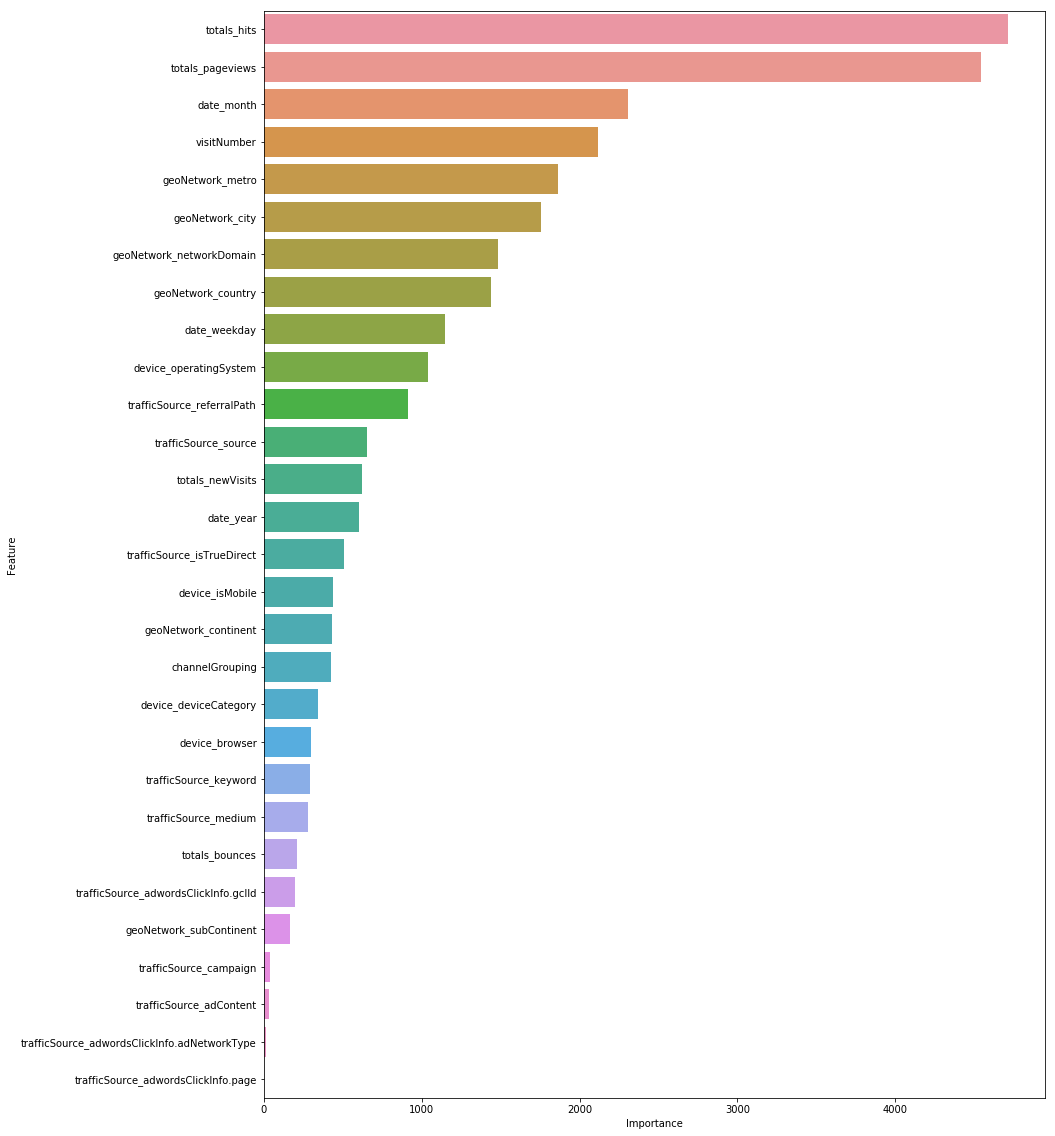

In [250]:
plt.figure(figsize=(14,20))
sns.barplot(data=imp.sort_values(by='Importance',ascending=False),x='Importance',y='Feature')

In [251]:
XSub = test.drop(['totals_transactionRevenue','fullVisitorId'],axis=1)
ySubmission_gb_pred = lgbmReg.predict(XSub,num_iteration=lgbmReg.best_iteration_)
submission = pd.DataFrame({"fullVisitorId":test['fullVisitorId'],
                          "PredictedLogRevenue":ySubmission_gb_pred})
submission['PredictedLogRevenue'] = submission['PredictedLogRevenue'].apply(lambda x:0.0 if x<0 else x)
submissionByVisitor = submission.groupby('fullVisitorId').sum()
submissionByVisitor.to_csv("submission.csv")